# Coding part of Bachelor Thesis "Predicting ICU Mortality with Machine Learning for Patient Admissions with Multiple Chronic Conditions and Patient Admissions with One Chronic Condition or other non-chronic conditions" 

### Dataset name: MIMIC-III Clinical Database
### Additional description of the dataset. https://mimic.mit.edu/docs/iii/tables/patients/
### Full access to the dataset is available through the link below. The application requirements were to apply through PhysioNet.org and complete a course along with this. https://physionet.org/content/mimiciii/1.4/


### This is the official website where the CCI2015.CSV file with chronic diseases can be downloaded, where the diseases are explained with their representative codes. https://hcup-us.ahrq.gov/toolssoftware/chronic/chronic.jsp#files, section: Downloading Information

Some cells can run for several minutes because of the large CSV files.

### STEP 1

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
#a csv file from https://hcup-us.ahrq.gov/toolssoftware/chronic/chronic.jsp#files that shows which codes in ICD-9 column are chronic or not

#'CATEGORY DESCRIPTION' column with number 1 shows that the disease with ICD-9-CM CODE DESCRIPTION is chronic
#and 'CATEGORY DESCRIPTION' column with number 0 shows that the disease with ICD-9-CM CODE DESCRIPTION is non-chronic
cci2015 = pd.read_csv("./data/cci2015.csv",sep=";")
cci2015 

,ICD-9-CM CODE,ICD-9-CM CODE DESCRIPTION,CATEGORY DESCRIPTION,BODY SYSTEM
0,10,CHOLERA D/T VIB CHOLERAE,0,1
1,11,CHOLERA D/T VIB EL TOR,0,1
2,19,CHOLERA NOS,0,1
3,20,TYPHOID FEVER,0,1
4,21,PARATYPHOID FEVER A,0,1
...,...,...,...,...
13764,V9129,Quad gest-plac/sac undet (begin 2010),0,18
13765,V9190,Mult gest-plac/sac NOS (begin 2010),0,18
13766,V9191,Mult gest 2+ monochr NEC (begin 2010),0,18
13767,V9192,Mult gest 2+ monoamn NEC (begin 2010),0,18


In [3]:
#removing the "BODY SYSTEM" column because for the research, this is not needed
cci2015.drop(columns=['BODY SYSTEM'], inplace=True)
cci2015

,ICD-9-CM CODE,ICD-9-CM CODE DESCRIPTION,CATEGORY DESCRIPTION
0,10,CHOLERA D/T VIB CHOLERAE,0
1,11,CHOLERA D/T VIB EL TOR,0
2,19,CHOLERA NOS,0
3,20,TYPHOID FEVER,0
4,21,PARATYPHOID FEVER A,0
...,...,...,...
13764,V9129,Quad gest-plac/sac undet (begin 2010),0
13765,V9190,Mult gest-plac/sac NOS (begin 2010),0
13766,V9191,Mult gest 2+ monochr NEC (begin 2010),0
13767,V9192,Mult gest 2+ monoamn NEC (begin 2010),0


In [4]:
#extracting only the chronic conditions so CATEGORY DESCRIPTION shows 1 only
cci2015 = cci2015[cci2015["CATEGORY DESCRIPTION"] == 1]
cci2015

,ICD-9-CM CODE,ICD-9-CM CODE DESCRIPTION,CATEGORY DESCRIPTION
645,42,HIV DISEASE (Begin 1994),1
646,420,HIV W/SPECIF INFECTIONS (Begin 1986 End 1994),1
647,421,HIV CAUS OTH SPEC INFECT (Begin 1986 End 1994),1
648,422,HIV W/SPEC MALIG NEOPLSM (Begin 1986 End 1994),1
649,429,AIDS UNSPECIFIED (Begin 1986 End 1994),1
...,...,...,...
13698,V8543,BMI 50.0-59.9 adult (begin 2010),1
13699,V8544,BMI 60.0-69.9 adult (begin 2010),1
13700,V8545,BMI 70 and over adult (begin 2010),1
13727,V8811,Acq total absnc pancreas (begin 2010),1


In [5]:
#There are 4584 general chronic conditions in cci2015.csv, but will find out later how many chronic diseases there are in the MIMIC III dataset file: D_ICD_DIAGNOSES.csv 
len(cci2015)

4584

In [6]:
#from now on the files are from MIMIC III only: https://physionet.org/content/mimiciii/1.4/

In [7]:
#This table shows the desease chodes ICD9_CODE, their short name "SHORT_TITLE" and long name "LONG_TITLE"
D_ICD_DIAGNOSES = pd.read_csv("./data/D_ICD_DIAGNOSES.csv",sep=",")
D_ICD_DIAGNOSES

,ROW_ID,ICD9_CODE,SHORT_TITLE,LONG_TITLE
0,174,01166,TB pneumonia-oth test,"Tuberculous pneumonia [any form], tubercle bac..."
1,175,01170,TB pneumothorax-unspec,"Tuberculous pneumothorax, unspecified"
2,176,01171,TB pneumothorax-no exam,"Tuberculous pneumothorax, bacteriological or h..."
3,177,01172,TB pneumothorx-exam unkn,"Tuberculous pneumothorax, bacteriological or h..."
4,178,01173,TB pneumothorax-micro dx,"Tuberculous pneumothorax, tubercle bacilli fou..."
...,...,...,...,...
14562,14432,V7399,Scrn unspcf viral dis,Special screening examination for unspecified ...
14563,14433,V740,Screening for cholera,Screening examination for cholera
14564,14434,V741,Screening-pulmonary TB,Screening examination for pulmonary tuberculosis
14565,14435,V742,Screening for leprosy,Screening examination for leprosy (Hansen's di...


In [8]:
#there are 14567 in the MIMIC III dataset chronic and non-chronic
len(D_ICD_DIAGNOSES)

14567

In [9]:
#Hospital assigned diagnoses, coded using the International Statistical Classification of Diseases and Related Health Problems (ICD) system
DIAGNOSES_ICD = pd.read_csv("./data/DIAGNOSES_ICD.csv",sep=";")
DIAGNOSES_ICD

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,1297,109,172335,1.0,40301
1,1298,109,172335,2.0,486
2,1299,109,172335,3.0,58281
3,1300,109,172335,4.0,5855
4,1301,109,172335,5.0,4254
...,...,...,...,...,...
651042,639798,97503,188195,2.0,20280
651043,639799,97503,188195,3.0,V5869
651044,639800,97503,188195,4.0,V1279
651045,639801,97503,188195,5.0,5275


In [10]:
#651047 Hospital assigned diagnoses
len(DIAGNOSES_ICD)

651047

In [11]:
#converting values into a string and removing white space 
DIAGNOSES_ICD["ICD9_CODE"] = DIAGNOSES_ICD["ICD9_CODE"].astype(str).str.strip()
cci2015["ICD-9-CM CODE"] = cci2015["ICD-9-CM CODE"].astype(str).str.strip()

#Based on the cci2015.csv file, 1 will be for chronic and 0 for non-chronic disease in the new 
#is_chronic column when comparing with the DIAGNOSES_ICD.csv file from the MIMIC III dataset
chronic_codes_set = set(cci2015["ICD-9-CM CODE"])
DIAGNOSES_ICD["is_chronic"] = DIAGNOSES_ICD["ICD9_CODE"].isin(chronic_codes_set).astype(int)

DIAGNOSES_ICD

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,is_chronic
0,1297,109,172335,1.0,40301,1
1,1298,109,172335,2.0,486,0
2,1299,109,172335,3.0,58281,1
3,1300,109,172335,4.0,5855,1
4,1301,109,172335,5.0,4254,1
...,...,...,...,...,...,...
651042,639798,97503,188195,2.0,20280,1
651043,639799,97503,188195,3.0,V5869,0
651044,639800,97503,188195,4.0,V1279,0
651045,639801,97503,188195,5.0,5275,0


In [12]:
#How many chronic conditions are there in MIMIC III
total_chronic = DIAGNOSES_ICD["is_chronic"].sum()
print("All chronic diagnoses in the dataset:", total_chronic)


All chronic diagnoses in the dataset: 326591


In [13]:
#creating a table only with chronic conditions

#grouping the created table with only chronic conditions by 'SUBJECT_ID', 'HADM_ID'
#creating a new column 'chronic_count' that will keep track of the chronic conditions per 
#'SUBJECT_ID', 'HADM_ID' because each number of SUBJECT_ID', 'HADM_ID can have multiple chronic
#conditions
grouped_df_step1 = DIAGNOSES_ICD.groupby(['SUBJECT_ID', 'HADM_ID']).agg(
    chronic_count=('is_chronic', 'sum')
).reset_index()
grouped_df_step1

,SUBJECT_ID,HADM_ID,chronic_count
0,2,163353,0
1,3,145834,5
2,4,185777,3
3,5,178980,0
4,6,107064,3
...,...,...,...
58971,99985,176670,4
58972,99991,151118,4
58973,99992,197084,5
58974,99995,137810,8


In [14]:
grouped_df_step1.query("chronic_count == 0")

,SUBJECT_ID,HADM_ID,chronic_count
0,2,163353,0
3,5,178980,0
5,7,118037,0
6,8,159514,0
8,10,184167,0
...,...,...,...
58615,98883,144680,0
58638,98952,151098,0
58719,99207,191004,0
58772,99362,122651,0


In [15]:
#there are NaN values, so to drop them, this code is used below: clean_DIAGNOSES_ICD = DIAGNOSES_ICD.dropna(subset=["SEQ_NUM"])
DIAGNOSES_ICD.isnull().sum() 

ROW_ID         0
SUBJECT_ID     0
HADM_ID        0
SEQ_NUM       47
ICD9_CODE      0
is_chronic     0
dtype: int64

In [16]:
#removing the NaN values
clean_DIAGNOSES_ICD = DIAGNOSES_ICD.dropna(subset=["SEQ_NUM"])

In [17]:
#returning the new name to be the old name of the table just to keep it simple
DIAGNOSES_ICD=clean_DIAGNOSES_ICD

In [18]:
#now there are no NaN values
DIAGNOSES_ICD.isnull().sum()

ROW_ID        0
SUBJECT_ID    0
HADM_ID       0
SEQ_NUM       0
ICD9_CODE     0
is_chronic    0
dtype: int64

In [19]:
#adding a new column 'MCC', which means multiple chronic conditions
#the values in the column are 1 when the chronic_count is >=2
#and 0 when chronic_count is <2
grouped_df_step1["MCC"] = (grouped_df_step1["chronic_count"] >= 2).astype(int)
grouped_df_step1

,SUBJECT_ID,HADM_ID,chronic_count,MCC
0,2,163353,0,0
1,3,145834,5,1
2,4,185777,3,1
3,5,178980,0,0
4,6,107064,3,1
...,...,...,...,...
58971,99985,176670,4,1
58972,99991,151118,4,1
58973,99992,197084,5,1
58974,99995,137810,8,1


In [20]:
#grouping the created table with only non-chronic conditions by SUBJECT_ID', 'HADM_ID and if there 
#is a patient admission with only one chronic, that patient admission is also included in the non-chronic group so MCC
#will be 0 too in that case
#creating a new column 'non-chronic' that will keep track of the non-chronic conditions or 
#1 chronic, or the combination of 1 chronic with multiple non-chronic conditions
non_chronic_counts = DIAGNOSES_ICD[DIAGNOSES_ICD["is_chronic"] == 0].groupby(
    ['SUBJECT_ID', 'HADM_ID']
).size().reset_index(name='non_chronic')

#merging the tables 
grouped_df_step1 = grouped_df_step1.merge(non_chronic_counts, on=['SUBJECT_ID', 'HADM_ID'], how='left')

#removing the NaN values and replacing them with 0s and making them integers
grouped_df_step1['non_chronic'] = grouped_df_step1['non_chronic'].fillna(0).astype(int)

grouped_df_step1.loc[grouped_df_step1["MCC"] == 1, "non_chronic"] = 0
grouped_df_step1

,SUBJECT_ID,HADM_ID,chronic_count,MCC,non_chronic
0,2,163353,0,0,3
1,3,145834,5,1,0
2,4,185777,3,1,0
3,5,178980,0,0,3
4,6,107064,3,1,0
...,...,...,...,...,...
58971,99985,176670,4,1,0
58972,99991,151118,4,1,0
58973,99992,197084,5,1,0
58974,99995,137810,8,1,0


In [21]:
#This group contains admissions of patients with 1 chronic condition, possibly along with non-chronic conditions
MCC0 = len(grouped_df_step1.query("MCC == 0"))
MCC0

10660

In [22]:
#This group contains admissions patients with more than or equal to 2 chronic conditions only
MCC1 = len(grouped_df_step1.query("MCC == 1"))
MCC1

48316

### STEP 2

In [23]:
#opening the following files from the MIMIC III dataset
#PATIENTS.csv: for the 'SUBJECT_ID' and date of death 'DOD' of each patient
#ADMISSIONS.csv: it connects subject_id with hadm_id
#ICUSTAYS.csv: it has ICU stay information, including OUTTIME

# If the patient died after their ICU stay, then mortality is equal to 1 (died in hospital)
# If the patient did not die or died long after discharge, mortality is equal to 0 (survived)

# All tables have the 'subject_id' as a common column

In [24]:
PATIENTS=pd.read_csv("./data/PATIENTS.csv",sep=",")
PATIENTS.head()

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1
2,236,251,M,2090-03-15 00:00:00,NaN,NaN,NaN,0
3,237,252,M,2078-03-06 00:00:00,NaN,NaN,NaN,0
4,238,253,F,2089-11-26 00:00:00,NaN,NaN,NaN,0


In [25]:
len(PATIENTS)

46520

In [26]:
ADMISSIONS=pd.read_csv("./data/ADMISSIONS.csv",sep=",")
ADMISSIONS

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,58594,98800,191113,2131-03-30 21:13:00,2131-04-02 15:02:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Private,ENGL,NOT SPECIFIED,SINGLE,WHITE,2131-03-30 19:44:00,2131-03-30 22:41:00,TRAUMA,0,1
58972,58595,98802,101071,2151-03-05 20:00:00,2151-03-06 09:10:00,2151-03-06 09:10:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,2151-03-05 17:23:00,2151-03-05 21:06:00,SAH,1,1
58973,58596,98805,122631,2200-09-12 07:15:00,2200-09-20 12:08:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Private,ENGL,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,RENAL CANCER/SDA,0,1
58974,58597,98813,170407,2128-11-11 02:29:00,2128-12-22 13:11:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,ENGL,CATHOLIC,MARRIED,WHITE,2128-11-10 23:48:00,2128-11-11 03:16:00,S/P FALL,0,0


In [27]:
len(ADMISSIONS)

58976

In [28]:
#checking if there are duplicates
duplicates = ADMISSIONS[ADMISSIONS.duplicated()]
duplicates

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA


In [29]:
ICUSTAYS=pd.read_csv("./data/ICUSTAYS.csv",sep=",")
ICUSTAYS.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS
0,365,268,110404,280836,carevue,MICU,MICU,52,52,2198-02-14 23:27:38,2198-02-18 05:26:11,3.2490
1,366,269,106296,206613,carevue,MICU,MICU,52,52,2170-11-05 11:05:29,2170-11-08 17:46:57,3.2788
2,367,270,188028,220345,carevue,CCU,CCU,57,57,2128-06-24 15:05:20,2128-06-27 12:32:29,2.8939
3,368,271,173727,249196,carevue,MICU,SICU,52,23,2120-08-07 23:12:42,2120-08-10 00:39:04,2.0600
4,369,272,164716,210407,carevue,CCU,CCU,57,57,2186-12-25 21:08:04,2186-12-27 12:01:13,1.6202


In [30]:
len(ICUSTAYS)

61532

In [31]:
#merging the Files

In [32]:
#First, merging the PATIENTS.csv file with the ADMISSIONS.csv file by the 'SUBJECT_ID' column
patient_adm_merged = pd.merge(ADMISSIONS, PATIENTS[["SUBJECT_ID", "DOD"]], on="SUBJECT_ID", how="left")
patient_adm_merged

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,DOD
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1,NaN
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1,NaN
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1,NaN
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1,NaN
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,58594,98800,191113,2131-03-30 21:13:00,2131-04-02 15:02:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Private,ENGL,NOT SPECIFIED,SINGLE,WHITE,2131-03-30 19:44:00,2131-03-30 22:41:00,TRAUMA,0,1,NaN
58972,58595,98802,101071,2151-03-05 20:00:00,2151-03-06 09:10:00,2151-03-06 09:10:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,2151-03-05 17:23:00,2151-03-05 21:06:00,SAH,1,1,2151-03-06 00:00:00
58973,58596,98805,122631,2200-09-12 07:15:00,2200-09-20 12:08:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Private,ENGL,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,RENAL CANCER/SDA,0,1,NaN
58974,58597,98813,170407,2128-11-11 02:29:00,2128-12-22 13:11:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,ENGL,CATHOLIC,MARRIED,WHITE,2128-11-10 23:48:00,2128-11-11 03:16:00,S/P FALL,0,0,NaN


In [33]:
#checking if there are NaN values
patient_adm_merged.isnull().sum()

ROW_ID                      0
SUBJECT_ID                  0
HADM_ID                     0
ADMITTIME                   0
DISCHTIME                   0
DEATHTIME               53122
ADMISSION_TYPE              0
ADMISSION_LOCATION          0
DISCHARGE_LOCATION          0
INSURANCE                   0
LANGUAGE                25332
RELIGION                  458
MARITAL_STATUS          10128
ETHNICITY                   0
EDREGTIME               28099
EDOUTTIME               28099
DIAGNOSIS                  25
HOSPITAL_EXPIRE_FLAG        0
HAS_CHARTEVENTS_DATA        0
DOD                     36390
dtype: int64

In [34]:
#After that, merging the table above with the 'ICUSTAYS.csv' by "SUBJECT_ID", "HADM_ID"
full_merged = pd.merge(patient_adm_merged,ICUSTAYS, on=["SUBJECT_ID", "HADM_ID"], how="inner")

#converting the columns with date type to datetime type
full_merged["DOD"] = pd.to_datetime(full_merged["DOD"])
full_merged["OUTTIME"] = pd.to_datetime(full_merged["OUTTIME"])
full_merged

,ROW_ID_x,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,ROW_ID_y,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,...,22,204798,carevue,MICU,MICU,52,52,2196-04-09 12:27:00,2196-04-10 15:54:00,1.1438
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,...,23,227807,carevue,CSRU,CSRU,14,14,2153-09-03 09:38:55,2153-09-04 15:59:11,1.2641
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,...,24,234044,metavision,SICU,SICU,57,57,2157-10-21 11:40:38,2157-10-22 16:08:48,1.1862
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,...,25,262236,carevue,CCU,CCU,7,7,2139-06-06 16:15:36,2139-06-07 04:33:25,0.5124
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,...,26,203487,carevue,CCU,CCU,7,7,2160-11-02 03:16:23,2160-11-05 16:23:27,3.5466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61527,58594,98800,191113,2131-03-30 21:13:00,2131-04-02 15:02:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Private,...,61129,210188,metavision,TSICU,TSICU,14,14,2131-03-30 21:14:14,2131-03-31 18:18:14,0.8778
61528,58595,98802,101071,2151-03-05 20:00:00,2151-03-06 09:10:00,2151-03-06 09:10:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Medicare,...,61130,294783,metavision,MICU,MICU,50,50,2151-03-05 20:01:18,2151-03-06 10:54:24,0.6202
61529,58596,98805,122631,2200-09-12 07:15:00,2200-09-20 12:08:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Private,...,61131,203155,metavision,MICU,MICU,52,52,2200-09-12 19:25:51,2200-09-14 18:17:01,1.9522
61530,58597,98813,170407,2128-11-11 02:29:00,2128-12-22 13:11:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,...,61132,283274,carevue,TSICU,TSICU,14,14,2128-11-11 02:30:42,2128-11-19 03:22:46,8.0362


In [35]:
#adding a new column 'mortality':
# if (data of death (DOD) is not null, which means alive patient) and (date of death (DOD) <= OUTTIME):
#     mortality = 1 #This means the patient died during or immediately after their ICU stay.
# else:
#     mortality = 0 #This means that the patient is alive


full_merged["mortality"] = full_merged["DOD"].notna() & (full_merged["DOD"] <= full_merged["OUTTIME"])
full_merged["mortality"] = full_merged["mortality"].astype(int)
full_merged
#explanation:
#full_merged["DOD"].notna() whether or not the DOD exists
#full_merged["DOD"] <= full_merged["OUTTIME"] check if the death happened when the ICU discharge time came or before that moment. 

,ROW_ID_x,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS,mortality
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,...,204798,carevue,MICU,MICU,52,52,2196-04-09 12:27:00,2196-04-10 15:54:00,1.1438,0
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,...,227807,carevue,CSRU,CSRU,14,14,2153-09-03 09:38:55,2153-09-04 15:59:11,1.2641,0
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,...,234044,metavision,SICU,SICU,57,57,2157-10-21 11:40:38,2157-10-22 16:08:48,1.1862,0
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,...,262236,carevue,CCU,CCU,7,7,2139-06-06 16:15:36,2139-06-07 04:33:25,0.5124,0
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,...,203487,carevue,CCU,CCU,7,7,2160-11-02 03:16:23,2160-11-05 16:23:27,3.5466,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61527,58594,98800,191113,2131-03-30 21:13:00,2131-04-02 15:02:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Private,...,210188,metavision,TSICU,TSICU,14,14,2131-03-30 21:14:14,2131-03-31 18:18:14,0.8778,0
61528,58595,98802,101071,2151-03-05 20:00:00,2151-03-06 09:10:00,2151-03-06 09:10:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Medicare,...,294783,metavision,MICU,MICU,50,50,2151-03-05 20:01:18,2151-03-06 10:54:24,0.6202,1
61529,58596,98805,122631,2200-09-12 07:15:00,2200-09-20 12:08:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Private,...,203155,metavision,MICU,MICU,52,52,2200-09-12 19:25:51,2200-09-14 18:17:01,1.9522,0
61530,58597,98813,170407,2128-11-11 02:29:00,2128-12-22 13:11:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,...,283274,carevue,TSICU,TSICU,14,14,2128-11-11 02:30:42,2128-11-19 03:22:46,8.0362,0


In [36]:
#merging with the MCC Table grouped_df_step1 (from Step 1)

In [37]:
#using "SUBJECT_ID" and "HADM_ID" to merge chronic_count and MCC from the Step 1 table.

final_df = pd.merge(full_merged, grouped_df_step1, on=["SUBJECT_ID", "HADM_ID"], how="left")
final_df

,ROW_ID_x,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS,mortality,chronic_count,MCC,non_chronic
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,...,MICU,52,52,2196-04-09 12:27:00,2196-04-10 15:54:00,1.1438,0,3,1,0
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,...,CSRU,14,14,2153-09-03 09:38:55,2153-09-04 15:59:11,1.2641,0,7,1,0
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,...,SICU,57,57,2157-10-21 11:40:38,2157-10-22 16:08:48,1.1862,0,6,1,0
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,...,CCU,7,7,2139-06-06 16:15:36,2139-06-07 04:33:25,0.5124,0,4,1,0
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,...,CCU,7,7,2160-11-02 03:16:23,2160-11-05 16:23:27,3.5466,0,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61527,58594,98800,191113,2131-03-30 21:13:00,2131-04-02 15:02:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Private,...,TSICU,14,14,2131-03-30 21:14:14,2131-03-31 18:18:14,0.8778,0,0,0,8
61528,58595,98802,101071,2151-03-05 20:00:00,2151-03-06 09:10:00,2151-03-06 09:10:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Medicare,...,MICU,50,50,2151-03-05 20:01:18,2151-03-06 10:54:24,0.6202,1,3,1,0
61529,58596,98805,122631,2200-09-12 07:15:00,2200-09-20 12:08:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Private,...,MICU,52,52,2200-09-12 19:25:51,2200-09-14 18:17:01,1.9522,0,5,1,0
61530,58597,98813,170407,2128-11-11 02:29:00,2128-12-22 13:11:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,...,TSICU,14,14,2128-11-11 02:30:42,2128-11-19 03:22:46,8.0362,0,2,1,0


In [38]:
len(final_df)

61532

In [39]:
#checking for NaN values
final_df.isnull().sum()

ROW_ID_x                    0
SUBJECT_ID                  0
HADM_ID                     0
ADMITTIME                   0
DISCHTIME                   0
DEATHTIME               54923
ADMISSION_TYPE              0
ADMISSION_LOCATION          0
DISCHARGE_LOCATION          0
INSURANCE                   0
LANGUAGE                26154
RELIGION                  480
MARITAL_STATUS          10240
ETHNICITY                   0
EDREGTIME               28760
EDOUTTIME               28760
DIAGNOSIS                   1
HOSPITAL_EXPIRE_FLAG        0
HAS_CHARTEVENTS_DATA        0
DOD                     37341
ROW_ID_y                    0
ICUSTAY_ID                  0
DBSOURCE                    0
FIRST_CAREUNIT              0
LAST_CAREUNIT               0
FIRST_WARDID                0
LAST_WARDID                 0
INTIME                      0
OUTTIME                    10
LOS                        10
mortality                   0
chronic_count               0
MCC                         0
non_chroni

In [40]:
len(final_df) #rows in the final_df

61532

In [41]:
#making the name df
df = final_df
#grouping the DIAGNOSES_ICD.csv by 'SUBJECT_ID' and count the unique codes of chronic diseases in 'ICD9_CODE'
diagnosis_counts = DIAGNOSES_ICD.groupby("SUBJECT_ID")["ICD9_CODE"].nunique().reset_index()
#putting the result in a new column 'num_conditions'
diagnosis_counts.columns = ["SUBJECT_ID", "num_conditions"]

#adding 'num_conditions' to the final_df by 'SUBJECT_ID'
final_df["num_conditions"] = final_df["SUBJECT_ID"].map(
    diagnosis_counts.set_index("SUBJECT_ID")["num_conditions"]
)
#counting the patient admissions in each group of MCC=0 and MCC=1
group_counts = df.groupby('MCC').size()

#counting the mortality in each group of  MCC=0 and MCC=1
deaths = df[df['mortality'] == 1].groupby('MCC').size()

#calculating the percentage of mortality per group
mortality_percentage = (deaths / group_counts * 100).fillna(0)


for mcc_value in sorted(mortality_percentage.index):
    print(f"MCC = {int(mcc_value)}: Mortality = {mortality_percentage[mcc_value]:.2f}%")

MCC = 0: Mortality = 2.37%
MCC = 1: Mortality = 8.90%


STEP 3

In [42]:
# So far, the following have already been combined:
# PATIENTS.csv, ADMISSIONS.csv, ICUSTAYS.csv, MCC (chronic count), and the mortality logic

In [43]:
#I merge "GENDER", "DOB" (date of birth) from PATIENTS.csv
final_df = pd.merge(final_df, PATIENTS[["SUBJECT_ID", "GENDER", "DOB"]], on="SUBJECT_ID", how="left")
final_df.head()

,ROW_ID_x,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,INTIME,OUTTIME,LOS,mortality,chronic_count,MCC,non_chronic,num_conditions,GENDER,DOB
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,...,2196-04-09 12:27:00,2196-04-10 15:54:00,1.1438,0,3,1,0,7.0,F,2131-05-07 00:00:00
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,...,2153-09-03 09:38:55,2153-09-04 15:59:11,1.2641,0,7,1,0,15.0,M,2082-07-17 00:00:00
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,...,2157-10-21 11:40:38,2157-10-22 16:08:48,1.1862,0,6,1,0,15.0,M,2082-07-17 00:00:00
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,...,2139-06-06 16:15:36,2139-06-07 04:33:25,0.5124,0,4,1,0,4.0,M,2100-05-31 00:00:00
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,...,2160-11-02 03:16:23,2160-11-05 16:23:27,3.5466,0,4,1,0,4.0,M,2101-11-21 00:00:00


In [44]:
#loading the CHARTEVENTS.csv file in Dask. I had to discover what the types were because they were very mixed.
import dask.dataframe as dd

dtypes = {
    'ROW_ID': 'int32',
    'SUBJECT_ID': 'int32',
    'HADM_ID': 'int32',
    'ICUSTAY_ID': 'float32',
    'ITEMID': 'int32',
    'CGID': 'float32',
    'VALUE': 'object',
    'VALUENUM': 'float32',
    'VALUEUOM': 'object',
    'WARNING': 'float32',
    'ERROR': 'float32',
    'RESULTSTATUS': 'object',
    'STOPPED': 'object'
}

CHARTEVENTS = dd.read_csv("./data/CHARTEVENTS.csv",sep=",",dtype=dtypes)
CHARTEVENTS.tail()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CHARTTIME,STORETIME,CGID,VALUE,VALUENUM,VALUEUOM,WARNING,ERROR,RESULTSTATUS,STOPPED
614294,330471885,99781,147562,200664.0,224847,2133-08-02 08:30:00,2133-08-02 08:30:00,14357.0,Moderate,NaN,NaN,0.0,0.0,NaN,NaN
614295,330471886,99781,147562,200664.0,224889,2133-08-02 08:30:00,2133-08-02 08:31:00,14357.0,Not applicable,NaN,NaN,0.0,0.0,NaN,NaN
614296,330471887,99781,147562,200664.0,224903,2133-08-02 08:30:00,2133-08-02 08:31:00,14357.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN
614297,330471888,99781,147562,200664.0,224910,2133-08-02 08:30:00,2133-08-02 08:31:00,14357.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN
614298,330471889,99781,147562,200664.0,224930,2133-08-02 08:30:00,2133-08-02 08:30:00,14357.0,Back,NaN,NaN,0.0,0.0,NaN,NaN


In [45]:
#loading the 'D_ITEMS.csv' file in pandas
d_items = pd.read_csv("./data/D_ITEMS.csv")

In [46]:
d_items

,ROW_ID,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID
0,457,497,Patient controlled analgesia (PCA) [Inject],NaN,carevue,chartevents,NaN,NaN,NaN,NaN
1,458,498,PCA Lockout (Min),NaN,carevue,chartevents,NaN,NaN,NaN,NaN
2,459,499,PCA Medication,NaN,carevue,chartevents,NaN,NaN,NaN,NaN
3,460,500,PCA Total Dose,NaN,carevue,chartevents,NaN,NaN,NaN,NaN
4,461,501,PCV Exh Vt (Obser),NaN,carevue,chartevents,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
12482,14518,226757,GCSMotorApacheIIValue,GCSMotorApacheIIValue,metavision,chartevents,Scores - APACHE II,NaN,Text,NaN
12483,14519,226758,GCSVerbalApacheIIValue,GCSVerbalApacheIIValue,metavision,chartevents,Scores - APACHE II,NaN,Text,NaN
12484,14520,226759,HCO3ApacheIIValue,HCO3ApacheIIValue,metavision,chartevents,Scores - APACHE II,NaN,Numeric,NaN
12485,14521,226760,HCO3Score,HCO3Score,metavision,chartevents,Scores - APACHE II,NaN,Numeric,NaN


In [47]:
#extracting the vital signs from the table
vital_keywords = [
    "Heart Rate", "Respiratory Rate", "Systolic Blood Pressure", 
    "Diastolic Blood Pressure", "Mean BP", "SpO2", 
    "Temperature", "Glucose"
]
#creating a column 'LABEL' to match any of the vital signs
vital_items = d_items[d_items['LABEL'].str.contains('|'.join(vital_keywords), case=False, na=False)]
vital_items.head()

,ROW_ID,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID
236,548,591,RLE [Temperature],NaN,carevue,chartevents,NaN,NaN,NaN,NaN
242,554,597,RUE [Temperature],NaN,carevue,chartevents,NaN,NaN,NaN,NaN
263,575,618,Respiratory Rate,NaN,carevue,chartevents,NaN,NaN,NaN,NaN
277,14,1455,fingerstick glucose,NaN,carevue,chartevents,NaN,NaN,NaN,NaN
475,212,211,Heart Rate,NaN,carevue,chartevents,NaN,NaN,NaN,NaN


In [48]:
#extracting the ID of each vital sign
vital_itemids = vital_items['ITEMID'].unique()
vital_itemids

array([   591,    597,    618,   1455,    211,   1310,    619,    645,
          646,    676,    677,    678,    679,    807,    811,   3447,
         3494,   1812,   5820,   3744,   3745,   3816,   1529,   2338,
         8554,   8537,   6719, 224027, 227054, 227015, 227016, 228388,
       224674, 224688, 224689, 224690, 225664, 224642, 227976, 227977,
       227978, 227979, 228242, 220621, 220045, 220046, 220047, 220210,
       226537, 226253, 226329, 223761, 223762], dtype=int64)

In [49]:
#keeping only the rows from 'CHARTEVENTS.csv' that have 'ITEMID' the same as one of the vital signs
vitals_df = CHARTEVENTS[CHARTEVENTS['ITEMID'].isin(vital_itemids)]
vitals_df 


,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CHARTTIME,STORETIME,CGID,VALUE,VALUENUM,VALUEUOM,WARNING,ERROR,RESULTSTATUS,STOPPED
npartitions=551,,,,,,,,,,,,,,,
,int32,int32,int32,float32,int32,string,string,float32,string,float32,string,float32,float32,string,string
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [50]:
#grouping the table above by 'ICUSTAY_ID', and adding a column 'VALUENUM' that will have the average 
#value of the vital signs
vitals_summary = vitals_df.groupby("ICUSTAY_ID")["VALUENUM"].mean().reset_index()
vitals_summary = vitals_summary.rename(columns={"VALUENUM": "mean_vitals"})

In [51]:
vitals_summary

,ICUSTAY_ID,mean_vitals
npartitions=1,,
,float32,float64
,...,...


In [52]:
#loading D_LABITEMS.csv
d_labitems = pd.read_csv("./data/D_LABITEMS.csv")

In [53]:
d_labitems

,ROW_ID,ITEMID,LABEL,FLUID,CATEGORY,LOINC_CODE
0,546,51346,Blasts,Cerebrospinal Fluid (CSF),Hematology,26447-3
1,547,51347,Eosinophils,Cerebrospinal Fluid (CSF),Hematology,26451-5
2,548,51348,"Hematocrit, CSF",Cerebrospinal Fluid (CSF),Hematology,30398-2
3,549,51349,Hypersegmented Neutrophils,Cerebrospinal Fluid (CSF),Hematology,26506-6
4,550,51350,Immunophenotyping,Cerebrospinal Fluid (CSF),Hematology,NaN
...,...,...,...,...,...,...
748,749,51551,VOIDED SPECIMEN,OTHER BODY FLUID,HEMATOLOGY,NaN
749,750,51552,VOIDED SPECIMEN,STOOL,CHEMISTRY,NaN
750,751,51553,VOIDED SPECIMEN,URINE,CHEMISTRY,NaN
751,752,51554,VOIDED SPECIMEN,JOINT FLUID,HEMATOLOGY,NaN


In [54]:
#taking several main tests in a lab from the "LABEL" column
lab_keywords = ["Creatinine", "WBC", "Hematocrit", "Hemoglobin", "Sodium", "Potassium", "BUN", "Lactate", "Glucose"]

#finding a match between the chosen names from "LABEL" in the list and from the table D_LABITEMS.csv column 'LABEL'
lab_items = d_labitems[d_labitems['LABEL'].str.contains('|'.join(lab_keywords), case=False, na=False)]
lab_items

,ROW_ID,ITEMID,LABEL,FLUID,CATEGORY,LOINC_CODE
2,548,51348,"Hematocrit, CSF",Cerebrospinal Fluid (CSF),Hematology,30398-2
17,563,51363,"WBC, CSF",Cerebrospinal Fluid (CSF),Hematology,26465-5
23,569,51369,"Hematocrit, Joint Fluid",Joint Fluid,Hematology,NaN
38,584,51384,"WBC, Joint Fluid",Joint Fluid,Hematology,26469-7
76,622,51422,"Hematocrit, Other Fluid",Other Body Fluid,Hematology,11153-4
...,...,...,...,...,...,...
715,716,51516,WBC,Urine,Hematology,5821-4
716,717,51517,WBC Casts,Urine,Hematology,5820-6
717,718,51518,WBC Clumps,Urine,Hematology,NaN
728,729,51529,Estimated Actual Glucose,BLOOD,CHEMISTRY,NaN


In [55]:
#taking the IDs from the column 'ITEMID'
lab_itemids = lab_items['ITEMID'].unique()
print(lab_itemids)

[51348 51363 51369 51384 51422 51439 51445 51458 50805 50809 50810 50811
 50813 50814 50822 50824 50833 50834 50841 50842 50843 50847 50848 50852
 50855 50912 50931 50954 50971 50983 51014 51015 51021 51022 51032 51034
 51041 51042 51052 51053 51054 51057 51058 51064 51065 51067 51070 51073
 51080 51081 51082 51084 51097 51099 51100 51106 51115 51128 51212 51221
 51222 51223 51224 51225 51285 51300 51478 51480 51516 51517 51518 51529
 51533]


In [56]:
#loading the 'LABEVENTS.csv' file
LABEVENTS = pd.read_csv("./data/LABEVENTS.csv")
LABEVENTS

,ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG
0,281,3,NaN,50820,2101-10-12 16:07:00,7.39,7.39,units,NaN
1,282,3,NaN,50800,2101-10-12 18:17:00,ART,NaN,NaN,NaN
2,283,3,NaN,50802,2101-10-12 18:17:00,-1,-1.00,mEq/L,NaN
3,284,3,NaN,50804,2101-10-12 18:17:00,22,22.00,mEq/L,NaN
4,285,3,NaN,50808,2101-10-12 18:17:00,0.93,0.93,mmol/L,abnormal
...,...,...,...,...,...,...,...,...,...
27854050,27428435,96443,103219.0,50882,2109-12-30 01:40:00,26,26.00,mEq/L,NaN
27854051,27428436,96443,103219.0,50885,2109-12-30 01:40:00,2.1,2.10,mg/dL,abnormal
27854052,27428437,96443,103219.0,50902,2109-12-30 01:40:00,97,97.00,mEq/L,NaN
27854053,27428438,96443,103219.0,50911,2109-12-30 01:40:00,2,2.00,ng/mL,NaN


In [57]:
#loading the 'ICUSTAYS.csv' file
ICUSTAYS = pd.read_csv("./data/ICUSTAYS.csv")
ICUSTAYS

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS
0,365,268,110404,280836,carevue,MICU,MICU,52,52,2198-02-14 23:27:38,2198-02-18 05:26:11,3.2490
1,366,269,106296,206613,carevue,MICU,MICU,52,52,2170-11-05 11:05:29,2170-11-08 17:46:57,3.2788
2,367,270,188028,220345,carevue,CCU,CCU,57,57,2128-06-24 15:05:20,2128-06-27 12:32:29,2.8939
3,368,271,173727,249196,carevue,MICU,SICU,52,23,2120-08-07 23:12:42,2120-08-10 00:39:04,2.0600
4,369,272,164716,210407,carevue,CCU,CCU,57,57,2186-12-25 21:08:04,2186-12-27 12:01:13,1.6202
...,...,...,...,...,...,...,...,...,...,...,...,...
61527,59806,94944,143774,201233,metavision,CSRU,CSRU,15,15,2104-04-15 10:18:16,2104-04-17 14:51:00,2.1894
61528,59807,94950,123750,283653,metavision,CCU,CCU,7,7,2155-12-08 05:33:16,2155-12-10 17:24:58,2.4942
61529,59808,94953,196881,241585,metavision,SICU,SICU,57,57,2160-03-03 16:09:11,2160-03-04 14:22:33,0.9259
61530,59809,94954,118475,202802,metavision,CSRU,CSRU,15,15,2183-03-25 09:53:10,2183-03-27 17:55:03,2.3346


In [58]:
#merging by "SUBJECT_ID" and"HADM_ID"
labs_with_icu = pd.merge(LABEVENTS, ICUSTAYS, on=["SUBJECT_ID", "HADM_ID"], how="left")

In [59]:
#converting the date type into a datetime type
labs_with_icu["charttime"] = pd.to_datetime(labs_with_icu["CHARTTIME"])
labs_with_icu["intime"] = pd.to_datetime(labs_with_icu["INTIME"])
labs_with_icu["outtime"] = pd.to_datetime(labs_with_icu["OUTTIME"])

In [60]:
labs_with_icu.head()

,ROW_ID_x,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG,ROW_ID_y,...,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS,charttime,intime,outtime
0,281,3,NaN,50820,2101-10-12 16:07:00,7.39,7.39,units,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2101-10-12 16:07:00,NaT,NaT
1,282,3,NaN,50800,2101-10-12 18:17:00,ART,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2101-10-12 18:17:00,NaT,NaT
2,283,3,NaN,50802,2101-10-12 18:17:00,-1,-1.00,mEq/L,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2101-10-12 18:17:00,NaT,NaT
3,284,3,NaN,50804,2101-10-12 18:17:00,22,22.00,mEq/L,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2101-10-12 18:17:00,NaT,NaT
4,285,3,NaN,50808,2101-10-12 18:17:00,0.93,0.93,mmol/L,abnormal,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2101-10-12 18:17:00,NaT,NaT


In [61]:
#excluding labs that are outside the ICU stay
labs_df = labs_with_icu[
    (labs_with_icu["charttime"] >= labs_with_icu["intime"]) &
    (labs_with_icu["charttime"] <= labs_with_icu["outtime"])
].copy()

In [62]:
labs_df

,ROW_ID_x,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG,ROW_ID_y,...,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS,charttime,intime,outtime
173,930,3,145834.0,50863,2101-10-22 04:00:00,89,89.0,IU/L,NaN,2.0,...,MICU,MICU,12.0,12.0,2101-10-20 19:10:11,2101-10-26 20:43:09,6.0646,2101-10-22 04:00:00,2101-10-20 19:10:11,2101-10-26 20:43:09
174,931,3,145834.0,50868,2101-10-22 04:00:00,13,13.0,mEq/L,NaN,2.0,...,MICU,MICU,12.0,12.0,2101-10-20 19:10:11,2101-10-26 20:43:09,6.0646,2101-10-22 04:00:00,2101-10-20 19:10:11,2101-10-26 20:43:09
175,932,3,145834.0,50878,2101-10-22 04:00:00,67,67.0,IU/L,abnormal,2.0,...,MICU,MICU,12.0,12.0,2101-10-20 19:10:11,2101-10-26 20:43:09,6.0646,2101-10-22 04:00:00,2101-10-20 19:10:11,2101-10-26 20:43:09
176,933,3,145834.0,50882,2101-10-22 04:00:00,15,15.0,mEq/L,abnormal,2.0,...,MICU,MICU,12.0,12.0,2101-10-20 19:10:11,2101-10-26 20:43:09,6.0646,2101-10-22 04:00:00,2101-10-20 19:10:11,2101-10-26 20:43:09
177,934,3,145834.0,50885,2101-10-22 04:00:00,0.8,0.8,mg/dL,NaN,2.0,...,MICU,MICU,12.0,12.0,2101-10-20 19:10:11,2101-10-26 20:43:09,6.0646,2101-10-22 04:00:00,2101-10-20 19:10:11,2101-10-26 20:43:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32331076,27428435,96443,103219.0,50882,2109-12-30 01:40:00,26,26.0,mEq/L,NaN,60329.0,...,CSRU,CSRU,15.0,12.0,2109-12-20 09:53:51,2110-01-05 17:40:34,16.3241,2109-12-30 01:40:00,2109-12-20 09:53:51,2110-01-05 17:40:34
32331077,27428436,96443,103219.0,50885,2109-12-30 01:40:00,2.1,2.1,mg/dL,abnormal,60329.0,...,CSRU,CSRU,15.0,12.0,2109-12-20 09:53:51,2110-01-05 17:40:34,16.3241,2109-12-30 01:40:00,2109-12-20 09:53:51,2110-01-05 17:40:34
32331078,27428437,96443,103219.0,50902,2109-12-30 01:40:00,97,97.0,mEq/L,NaN,60329.0,...,CSRU,CSRU,15.0,12.0,2109-12-20 09:53:51,2110-01-05 17:40:34,16.3241,2109-12-30 01:40:00,2109-12-20 09:53:51,2110-01-05 17:40:34
32331079,27428438,96443,103219.0,50911,2109-12-30 01:40:00,2,2.0,ng/mL,NaN,60329.0,...,CSRU,CSRU,15.0,12.0,2109-12-20 09:53:51,2110-01-05 17:40:34,16.3241,2109-12-30 01:40:00,2109-12-20 09:53:51,2110-01-05 17:40:34


In [63]:
#creating a new table that has information filtered by the "ITEMID" - if there are rows in the needed
#range, they will be included only
lab_df = labs_df[labs_df["ITEMID"].isin(lab_itemids)]
lab_df.head()

,ROW_ID_x,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG,ROW_ID_y,...,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS,charttime,intime,outtime
180,937,3,145834.0,50912,2101-10-22 04:00:00,1.9,1.9,mg/dL,abnormal,2.0,...,MICU,MICU,12.0,12.0,2101-10-20 19:10:11,2101-10-26 20:43:09,6.0646,2101-10-22 04:00:00,2101-10-20 19:10:11,2101-10-26 20:43:09
181,938,3,145834.0,50931,2101-10-22 04:00:00,133,133.0,mg/dL,abnormal,2.0,...,MICU,MICU,12.0,12.0,2101-10-20 19:10:11,2101-10-26 20:43:09,6.0646,2101-10-22 04:00:00,2101-10-20 19:10:11,2101-10-26 20:43:09
184,941,3,145834.0,50971,2101-10-22 04:00:00,4.3,4.3,mEq/L,NaN,2.0,...,MICU,MICU,12.0,12.0,2101-10-20 19:10:11,2101-10-26 20:43:09,6.0646,2101-10-22 04:00:00,2101-10-20 19:10:11,2101-10-26 20:43:09
185,942,3,145834.0,50983,2101-10-22 04:00:00,136,136.0,mEq/L,NaN,2.0,...,MICU,MICU,12.0,12.0,2101-10-20 19:10:11,2101-10-26 20:43:09,6.0646,2101-10-22 04:00:00,2101-10-20 19:10:11,2101-10-26 20:43:09
191,948,3,145834.0,51221,2101-10-22 04:00:00,28.6,28.6,%,abnormal,2.0,...,MICU,MICU,12.0,12.0,2101-10-20 19:10:11,2101-10-26 20:43:09,6.0646,2101-10-22 04:00:00,2101-10-20 19:10:11,2101-10-26 20:43:09


In [64]:
#creating a new table where the 'mean_labs' column shows the mean value of the 'VALUENUM' per ICU stay
labs_summary = lab_df.groupby("ICUSTAY_ID")["VALUENUM"].mean().reset_index()
#I switch the name "VALUENUM" to "mean_labs"
labs_summary.rename(columns={"VALUENUM": "mean_labs"}, inplace=True)

In [65]:
labs_summary

,ICUSTAY_ID,mean_labs
0,200001.0,45.008696
1,200003.0,53.115517
2,200006.0,35.012500
3,200007.0,59.700000
4,200009.0,44.867143
...,...,...
57746,299993.0,60.806452
57747,299994.0,54.787898
57748,299995.0,43.181250
57749,299998.0,62.244444


In [66]:
vitals_summary

,ICUSTAY_ID,mean_vitals
npartitions=1,,
,float32,float64
,...,...


In [67]:
#this cell needs 2 minutes to give output

#converting the Dask version into Pandas version through the compute() function
#because two tables need to be merged, and both need to be pandas versions.
vitals_summary_pd = vitals_summary.compute()

#merging the pandas tables final_df and vitals_summary_pd by "ICUSTAY_ID" column
final_df = pd.merge(final_df, vitals_summary_pd, on="ICUSTAY_ID", how="left")

In [68]:
#this cell needs 2 minutes to give output

#Then merging the tables final_df and labs_summary by "ICUSTAY_ID" column
final_df = pd.merge(final_df, labs_summary, on="ICUSTAY_ID", how="left")

In [69]:
final_df

,ROW_ID_x,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,LOS,mortality,chronic_count,MCC,non_chronic,num_conditions,GENDER,DOB,mean_vitals,mean_labs
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,...,1.1438,0,3,1,0,7.0,F,2131-05-07 00:00:00,86.325756,63.500000
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,...,1.2641,0,7,1,0,15.0,M,2082-07-17 00:00:00,78.625988,50.929412
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,...,1.1862,0,6,1,0,15.0,M,2082-07-17 00:00:00,58.622471,54.000000
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,...,0.5124,0,4,1,0,4.0,M,2100-05-31 00:00:00,74.410651,54.527273
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,...,3.5466,0,4,1,0,4.0,M,2101-11-21 00:00:00,85.180185,58.217857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61527,58594,98800,191113,2131-03-30 21:13:00,2131-04-02 15:02:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Private,...,0.8778,0,0,0,8,8.0,F,2111-11-05 00:00:00,49.293103,48.793333
61528,58595,98802,101071,2151-03-05 20:00:00,2151-03-06 09:10:00,2151-03-06 09:10:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Medicare,...,0.6202,1,3,1,0,4.0,F,2067-09-21 00:00:00,56.376472,NaN
61529,58596,98805,122631,2200-09-12 07:15:00,2200-09-20 12:08:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Private,...,1.9522,0,5,1,0,17.0,M,2158-03-02 00:00:00,72.159212,54.062162
61530,58597,98813,170407,2128-11-11 02:29:00,2128-12-22 13:11:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,...,8.0362,0,2,1,0,46.0,F,2068-02-04 00:00:00,NaN,48.596552


In [70]:
#how many unique "ROW_ID_x" column has
final_df['ROW_ID_x'].nunique()

57786

In [71]:
#grouping the final_df table by column "MCC", adding a column "total_diagnoses" which contains how 
#many rows are in each group
mygroup = final_df.groupby(['MCC']).agg(
    total_diagnoses=('MCC', 'count'),
).reset_index()

In [72]:
mygroup #total diagnoses per group

,MCC,total_diagnoses
0,0,10577
1,1,50955


In [73]:
#removing unneeded columns
final_df.drop(columns=[
    "ROW_ID_x",
    "ADMITTIME", "DISCHTIME",
    "INSURANCE",
    "ADMISSION_TYPE", "ADMISSION_LOCATION", "DISCHARGE_LOCATION",
    "DEATHTIME",
    "DOB"
], inplace=True)


In [74]:
#removing some more unneeded columns
final_df.drop(columns=[
    "SUBJECT_ID", "HADM_ID", "LANGUAGE", "RELIGION", "MARITAL_STATUS",
    "EDREGTIME", "EDOUTTIME", "DIAGNOSIS", "HOSPITAL_EXPIRE_FLAG", "OUTTIME"
], inplace=True)


In [75]:
final_df

,ETHNICITY,HAS_CHARTEVENTS_DATA,DOD,ROW_ID_y,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,LOS,mortality,chronic_count,MCC,non_chronic,num_conditions,GENDER,mean_vitals,mean_labs
0,WHITE,1,NaT,22,204798,carevue,MICU,MICU,52,52,2196-04-09 12:27:00,1.1438,0,3,1,0,7.0,F,86.325756,63.500000
1,WHITE,1,NaT,23,227807,carevue,CSRU,CSRU,14,14,2153-09-03 09:38:55,1.2641,0,7,1,0,15.0,M,78.625988,50.929412
2,WHITE,1,NaT,24,234044,metavision,SICU,SICU,57,57,2157-10-21 11:40:38,1.1862,0,6,1,0,15.0,M,58.622471,54.000000
3,WHITE,1,NaT,25,262236,carevue,CCU,CCU,7,7,2139-06-06 16:15:36,0.5124,0,4,1,0,4.0,M,74.410651,54.527273
4,WHITE,1,NaT,26,203487,carevue,CCU,CCU,7,7,2160-11-02 03:16:23,3.5466,0,4,1,0,4.0,M,85.180185,58.217857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61527,WHITE,1,NaT,61129,210188,metavision,TSICU,TSICU,14,14,2131-03-30 21:14:14,0.8778,0,0,0,8,8.0,F,49.293103,48.793333
61528,WHITE,1,2151-03-06,61130,294783,metavision,MICU,MICU,50,50,2151-03-05 20:01:18,0.6202,1,3,1,0,4.0,F,56.376472,NaN
61529,WHITE,1,NaT,61131,203155,metavision,MICU,MICU,52,52,2200-09-12 19:25:51,1.9522,0,5,1,0,17.0,M,72.159212,54.062162
61530,WHITE,0,NaT,61132,283274,carevue,TSICU,TSICU,14,14,2128-11-11 02:30:42,8.0362,0,2,1,0,46.0,F,NaN,48.596552


In [76]:
#removing some more unneeded columns
final_df.drop(columns=[
    "HAS_CHARTEVENTS_DATA", "DOD", "ROW_ID_y", "ICUSTAY_ID", "DBSOURCE",
    "FIRST_WARDID", "LAST_WARDID", "INTIME"
], inplace=True)



In [77]:
final_df

,ETHNICITY,FIRST_CAREUNIT,LAST_CAREUNIT,LOS,mortality,chronic_count,MCC,non_chronic,num_conditions,GENDER,mean_vitals,mean_labs
0,WHITE,MICU,MICU,1.1438,0,3,1,0,7.0,F,86.325756,63.500000
1,WHITE,CSRU,CSRU,1.2641,0,7,1,0,15.0,M,78.625988,50.929412
2,WHITE,SICU,SICU,1.1862,0,6,1,0,15.0,M,58.622471,54.000000
3,WHITE,CCU,CCU,0.5124,0,4,1,0,4.0,M,74.410651,54.527273
4,WHITE,CCU,CCU,3.5466,0,4,1,0,4.0,M,85.180185,58.217857
...,...,...,...,...,...,...,...,...,...,...,...,...
61527,WHITE,TSICU,TSICU,0.8778,0,0,0,8,8.0,F,49.293103,48.793333
61528,WHITE,MICU,MICU,0.6202,1,3,1,0,4.0,F,56.376472,NaN
61529,WHITE,MICU,MICU,1.9522,0,5,1,0,17.0,M,72.159212,54.062162
61530,WHITE,TSICU,TSICU,8.0362,0,2,1,0,46.0,F,NaN,48.596552


In [78]:
#In the 'mean_vitals' column, replacing the NaN values with the mean value of all the numbers in the
#'mean_vitals' column that are not NaN
final_df['mean_vitals'] = final_df['mean_vitals'].fillna(final_df['mean_vitals'].mean())

#In the 'mean_labs' column, replacing the NaN values with the mean value of all the numbers in the
#'mean_labs' column that are not NaN
final_df['mean_labs'] = final_df['mean_labs'].fillna(final_df['mean_labs'].mean())

<Axes: >

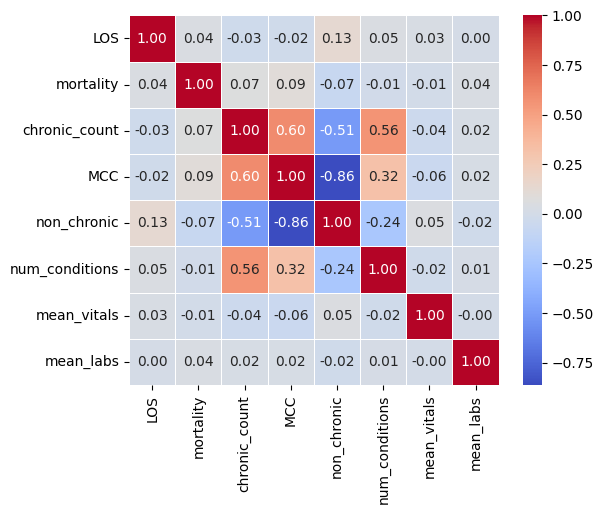

In [79]:
#creating a heatmap that shows on the row 'Mortality', which number other than 1 is the highest.
#That number has the biggest influence on the mortality accuracy
import seaborn as sns
sns.heatmap(final_df.corr(numeric_only=True), 
            annot=True,          
            cmap='coolwarm',     
            fmt=".2f",           
            linewidths=0.5,      
            square=True) 

In [80]:
#removing the rows where column 'LOS' has a NaN value
#LOS = length of stay in the ICU 
final_df = final_df.dropna(subset=['LOS'])
final_df

,ETHNICITY,FIRST_CAREUNIT,LAST_CAREUNIT,LOS,mortality,chronic_count,MCC,non_chronic,num_conditions,GENDER,mean_vitals,mean_labs
0,WHITE,MICU,MICU,1.1438,0,3,1,0,7.0,F,86.325756,63.500000
1,WHITE,CSRU,CSRU,1.2641,0,7,1,0,15.0,M,78.625988,50.929412
2,WHITE,SICU,SICU,1.1862,0,6,1,0,15.0,M,58.622471,54.000000
3,WHITE,CCU,CCU,0.5124,0,4,1,0,4.0,M,74.410651,54.527273
4,WHITE,CCU,CCU,3.5466,0,4,1,0,4.0,M,85.180185,58.217857
...,...,...,...,...,...,...,...,...,...,...,...,...
61527,WHITE,TSICU,TSICU,0.8778,0,0,0,8,8.0,F,49.293103,48.793333
61528,WHITE,MICU,MICU,0.6202,1,3,1,0,4.0,F,56.376472,62.886918
61529,WHITE,MICU,MICU,1.9522,0,5,1,0,17.0,M,72.159212,54.062162
61530,WHITE,TSICU,TSICU,8.0362,0,2,1,0,46.0,F,76.843557,48.596552


In [81]:
final_df.isnull().sum()

ETHNICITY         0
FIRST_CAREUNIT    0
LAST_CAREUNIT     0
LOS               0
mortality         0
chronic_count     0
MCC               0
non_chronic       0
num_conditions    1
GENDER            0
mean_vitals       0
mean_labs         0
dtype: int64

In [82]:
#removing the rows where column 'num_conditions' has a NaN value
final_df = final_df.dropna(subset=['num_conditions'])
final_df

,ETHNICITY,FIRST_CAREUNIT,LAST_CAREUNIT,LOS,mortality,chronic_count,MCC,non_chronic,num_conditions,GENDER,mean_vitals,mean_labs
0,WHITE,MICU,MICU,1.1438,0,3,1,0,7.0,F,86.325756,63.500000
1,WHITE,CSRU,CSRU,1.2641,0,7,1,0,15.0,M,78.625988,50.929412
2,WHITE,SICU,SICU,1.1862,0,6,1,0,15.0,M,58.622471,54.000000
3,WHITE,CCU,CCU,0.5124,0,4,1,0,4.0,M,74.410651,54.527273
4,WHITE,CCU,CCU,3.5466,0,4,1,0,4.0,M,85.180185,58.217857
...,...,...,...,...,...,...,...,...,...,...,...,...
61527,WHITE,TSICU,TSICU,0.8778,0,0,0,8,8.0,F,49.293103,48.793333
61528,WHITE,MICU,MICU,0.6202,1,3,1,0,4.0,F,56.376472,62.886918
61529,WHITE,MICU,MICU,1.9522,0,5,1,0,17.0,M,72.159212,54.062162
61530,WHITE,TSICU,TSICU,8.0362,0,2,1,0,46.0,F,76.843557,48.596552


In [83]:
final_df.isnull().sum()

ETHNICITY         0
FIRST_CAREUNIT    0
LAST_CAREUNIT     0
LOS               0
mortality         0
chronic_count     0
MCC               0
non_chronic       0
num_conditions    0
GENDER            0
mean_vitals       0
mean_labs         0
dtype: int64

In [84]:
#adding this additional cell before splitting the df into two groups to compare the
#whole dataset AUC with the traditional model, SAPS II AUC of 0.77, and checking if XGBoost 
#of the whole dataset called 'final_df' will outperform the SAPS II with AUC=0.77

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

scaler = StandardScaler()

#applying one-hot to make these specific columns binary; the rest of the columns from 'final_df'
#will not be taken to be binary
df_all = pd.get_dummies(
    final_df,
    columns=["ETHNICITY", "FIRST_CAREUNIT", "LAST_CAREUNIT", "GENDER"],
    drop_first=True
)
#some features have very low importance for the final result, so it is better to drop them
#so, first, creating this list
#then deciding which features to drop exactly based on the Feature importance below
low_importance = [
    "ETHNICITY_HISPANIC/LATINO - SALVADORAN",
    "ETHNICITY_MIDDLE EASTERN",
    "ETHNICITY_HISPANIC/LATINO - CUBAN",
    "ETHNICITY_HISPANIC/LATINO - GUATEMALAN",
    "ETHNICITY_MULTI RACE ETHNICITY",
    "ETHNICITY_HISPANIC/LATINO - DOMINICAN",
    "ETHNICITY_HISPANIC/LATINO - HONDURAN",
    "ETHNICITY_WHITE - EASTERN EUROPEAN",
    "ETHNICITY_WHITE - BRAZILIAN",
    "LAST_CAREUNIT_NICU",
    "ETHNICITY_ASIAN - JAPANESE",
    "ETHNICITY_CARIBBEAN ISLAND",
    "ETHNICITY_HISPANIC/LATINO - COLOMBIAN",
    "ETHNICITY_HISPANIC/LATINO - CENTRAL AMERICAN (OTHER)",
    "ETHNICITY_HISPANIC/LATINO - MEXICAN",
    "ETHNICITY_ASIAN - THAI",
    "ETHNICITY_BLACK/AFRICAN",
    "ETHNICITY_ASIAN - VIETNAMESE",
    "ETHNICITY_BLACK/HAITIAN",
    "ETHNICITY_SOUTH AMERICAN",
    "ETHNICITY_ASIAN - OTHER",
    "ETHNICITY_ASIAN - ASIAN INDIAN",
    "ETHNICITY_AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE",
    "ETHNICITY_ASIAN - FILIPINO",
    "ETHNICITY_ASIAN - KOREAN",
    "ETHNICITY_OTHER",
    "ETHNICITY_BLACK/AFRICAN AMERICAN",
    "FIRST_CAREUNIT_TSICU",
    "LAST_CAREUNIT_SICU",
    "ETHNICITY_PATIENT DECLINED TO ANSWER",
    "GENDER_M",
    "ETHNICITY_BLACK/CAPE VERDEAN",
    "ETHNICITY_NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER",
    "ETHNICITY_ASIAN - CAMBODIAN",
    "ETHNICITY_PORTUGUESE",
    "ETHNICITY_WHITE - OTHER EUROPEAN",
    "ETHNICITY_WHITE",
    "ETHNICITY_HISPANIC OR LATINO",
    "ETHNICITY_WHITE - RUSSIAN",
    "ETHNICITY_ASIAN - CHINESE",
    "ETHNICITY_ASIAN",
    "numcond_x_los",
    "chronic_x_los",
    "vitals_x_labs",
    "chronic_x_los", 
    "numcond_x_los"
]
#This is the actual drop of features
df_all.drop(columns=[col for col in low_importance if col in df_all.columns], inplace=True)

#creating the X and y variables
X_all = df_all.drop(columns=["mortality"])
y_all = df_all["mortality"]

#the train-test split
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    X_all, y_all, stratify=y_all, test_size=0.2, random_state=42)

#columns with numeric variables need to be extracted
numeric_cols = ['LOS', 'chronic_count', 'mean_vitals', 'mean_labs', 'num_conditions']

#doing feature scaling for the "numeric_cols" list on train and test
X_train_all[numeric_cols] = scaler.fit_transform(X_train_all[numeric_cols])
X_test_all[numeric_cols] = scaler.transform(X_test_all[numeric_cols])

#adding an interaction feature that catches the chronic conditions' interaction with the LOS (length of stay)
#because the conditions might be stronger than the LOS is longer
X_train_all["chronic_x_los"] = X_train_all["chronic_count"] * X_train_all["LOS"]
#adding an interaction feature that catches the overall condition within the LOS
X_train_all["numcond_x_los"] = X_train_all["num_conditions"] * X_train_all["LOS"]
#adding an interaction feature that mix mean_vitals and mean_labs
X_train_all["vitals_x_labs"] = X_train_all["mean_vitals"] * X_train_all["mean_labs"]

#Here testing, making the predictions
X_test_all["chronic_x_los"] = X_test_all["chronic_count"] * X_test_all["LOS"]
X_test_all["numcond_x_los"] = X_test_all["num_conditions"] * X_test_all["LOS"]
X_test_all["vitals_x_labs"] = X_test_all["mean_vitals"] * X_test_all["mean_labs"]

#In order to have more balance in the groups, adding SMOTE method
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
#It leans from X_train_all, y_train_all
X_train_all_res, y_train_all_res = sm.fit_resample(X_train_all, y_train_all)

#Now when there is balance, applying the XGBoost ML model
xgb_base = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_jobs=-1)
#I do the weight per class
scale_weight = y_train_all_res.value_counts()[0] / y_train_all_res.value_counts()[1]

xgb_all_model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    n_estimators=100,  
    max_depth=6,       
    learning_rate=0.05,
    scale_pos_weight=scale_weight,
    n_jobs=-1
)

#defining hyperparameters
param_dist = {
    'n_estimators': [100, 150, 200],
    'max_depth': [3, 5, 6, 7, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'min_child_weight': [1, 5, 10]
}

#The above dictionary is for the RandomizedSearchCV function to do a random sample from each 
#hyperparameter
search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist,
    n_iter=20,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

#fitting the best model
search.fit(X_train_all_res, y_train_all_res)
best_params = search.best_params_

#This is the finalized model with the best parameters
xgb_all_model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale_weight,
    n_jobs=-1,
    **best_params
)
#training the model with balanced classes because of the SMOTE method
xgb_all_model.fit(X_train_all_res, y_train_all_res)

#Predictions for the MCC=1
y_pred_all = xgb_all_model.predict(X_test_all)
y_proba_all = xgb_all_model.predict_proba(X_test_all)[:, 1]

#setting a threshold to be 0.4, so if P>=0.4, then put 1 for MCC (positive). This increases recall because there is
#a possibility of having false positives.
custom_threshold = 0.4
#this is binary 0 or 1 
y_pred_all_custom = (y_proba_all >= custom_threshold).astype(int) 

print("\n All patients: XGBoost at Threshold = 0.4")
print("Accuracy:", accuracy_score(y_test_all, y_pred_all_custom))
print("Classification Report:\n", classification_report(y_test_all, y_pred_all_custom))
print("Confusion Matrix:\n", confusion_matrix(y_test_all, y_pred_all_custom))
print("AUC Score:", roc_auc_score(y_test_all, y_proba_all))


Fitting 3 folds for each of 20 candidates, totalling 60 fits

 All patients: XGBoost at Threshold = 0.4
Accuracy: 0.8086143843965867
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.83      0.89     11348
           1       0.22      0.59      0.32       957

    accuracy                           0.81     12305
   macro avg       0.59      0.71      0.61     12305
weighted avg       0.90      0.81      0.84     12305

Confusion Matrix:
 [[9384 1964]
 [ 391  566]]
AUC Score: 0.8111738303629932


In [85]:
#It can be concluded that the SAPS II AUC result of 0.77 is lower than the ML XGBoost model on the whole dataset with AUC of 0.81.
#So, the ML XGBoost algorithm outperforms the traditional method, SAPS II.


Top 20 important features
                                     feature  importance
12                       FIRST_CAREUNIT_NICU    0.373017
14                        LAST_CAREUNIT_CSRU    0.084734
4                             num_conditions    0.078811
1                              chronic_count    0.053212
6                                  mean_labs    0.051743
0                                        LOS    0.038217
2                                        MCC    0.037457
9            ETHNICITY_UNKNOWN/NOT SPECIFIED    0.035268
15                        LAST_CAREUNIT_MICU    0.033869
8                 ETHNICITY_UNABLE TO OBTAIN    0.029320
10                       FIRST_CAREUNIT_CSRU    0.028902
16                       LAST_CAREUNIT_TSICU    0.024668
5                                mean_vitals    0.017728
19                             vitals_x_labs    0.017102
3                                non_chronic    0.017029
11                       FIRST_CAREUNIT_MICU    0.016809
13  

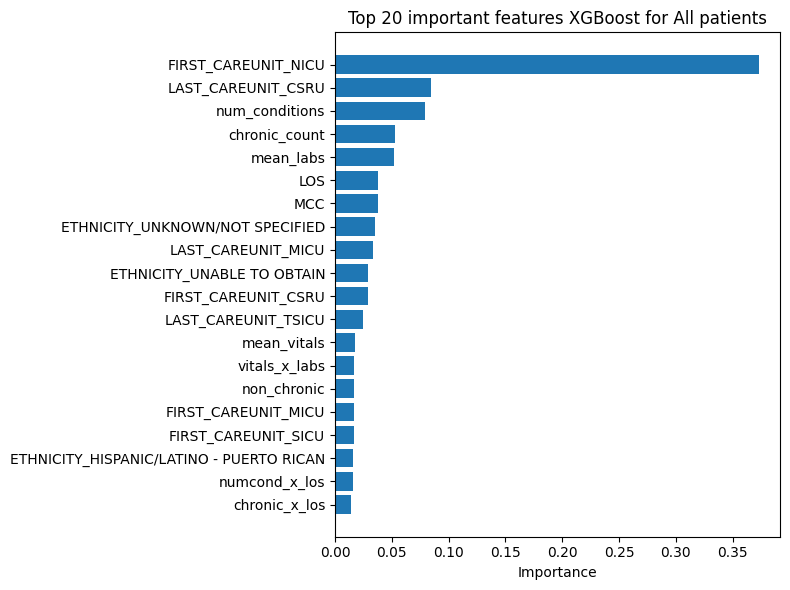

In [86]:
#Feature importance
importances = xgb_all_model.feature_importances_
feature_names = X_train_all_res.columns # Use the feature names from your full dataset
feat_imp = pd.DataFrame({'feature': feature_names, 'importance': importances})
feat_imp = feat_imp.sort_values(by='importance', ascending=False)
 
#This shows top 20 features
print("\nTop 20 important features")
print(feat_imp.head(20))

#This shows bottom 10 features
print("\nBottom 10 important features ===")
print(feat_imp.tail(10))

#Visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.barh(feat_imp['feature'][:20][::-1], feat_imp['importance'][:20][::-1])
plt.title('Top 20 important features XGBoost for All patients')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

In [87]:
df_mcc_0 = final_df[final_df['MCC'] == 0].copy()
df_mcc_1 = final_df[final_df['MCC'] == 1].copy()

In [88]:
df_mcc_0

,ETHNICITY,FIRST_CAREUNIT,LAST_CAREUNIT,LOS,mortality,chronic_count,MCC,non_chronic,num_conditions,GENDER,mean_vitals,mean_labs
6,WHITE,NICU,NICU,0.1298,0,0,0,4,4.0,F,95.600000,39.500000
20,UNKNOWN/NOT SPECIFIED,NICU,NICU,9.7451,0,1,0,8,9.0,F,113.956432,57.500000
28,WHITE,NICU,NICU,0.3678,0,1,0,3,4.0,F,101.394737,42.150000
29,WHITE,NICU,NICU,0.2499,0,1,0,3,4.0,F,76.843557,62.886918
37,BLACK/AFRICAN AMERICAN,NICU,NICU,0.1111,0,0,0,3,3.0,F,103.785714,62.886918
...,...,...,...,...,...,...,...,...,...,...,...,...
61493,HISPANIC OR LATINO,TSICU,TSICU,1.1248,0,0,0,11,11.0,M,67.096050,54.975000
61505,WHITE,MICU,SICU,1.7883,0,1,0,10,47.0,M,76.337304,50.352000
61516,WHITE,SICU,SICU,0.9181,0,1,0,0,1.0,M,60.308336,55.316667
61520,WHITE,MICU,MICU,1.2380,0,0,0,5,5.0,F,70.624659,65.451724


In [89]:
df_mcc_1

,ETHNICITY,FIRST_CAREUNIT,LAST_CAREUNIT,LOS,mortality,chronic_count,MCC,non_chronic,num_conditions,GENDER,mean_vitals,mean_labs
0,WHITE,MICU,MICU,1.1438,0,3,1,0,7.0,F,86.325756,63.500000
1,WHITE,CSRU,CSRU,1.2641,0,7,1,0,15.0,M,78.625988,50.929412
2,WHITE,SICU,SICU,1.1862,0,6,1,0,15.0,M,58.622471,54.000000
3,WHITE,CCU,CCU,0.5124,0,4,1,0,4.0,M,74.410651,54.527273
4,WHITE,CCU,CCU,3.5466,0,4,1,0,4.0,M,85.180185,58.217857
...,...,...,...,...,...,...,...,...,...,...,...,...
61526,WHITE,MICU,MICU,1.2382,1,4,1,0,9.0,M,54.967350,48.900000
61528,WHITE,MICU,MICU,0.6202,1,3,1,0,4.0,F,56.376472,62.886918
61529,WHITE,MICU,MICU,1.9522,0,5,1,0,17.0,M,72.159212,54.062162
61530,WHITE,TSICU,TSICU,8.0362,0,2,1,0,46.0,F,76.843557,48.596552


# Logistic Regression on MCC == 0

In [90]:
#applying SMOTE extra tool on the Logistic Regression for better output

In [91]:
#SMOTE + Logistic Regression for MCC == 0
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_recall_curve
from imblearn.over_sampling import SMOTE

#defining X and y
X = df_mcc_0.drop(columns=["mortality"])
y = df_mcc_0["mortality"]

#applying one-hot
X_encoded = pd.get_dummies(X, drop_first=True)
X = X_encoded

#splitting train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#creating a list with numeric columns and use it below
numeric_cols = ['LOS', 'chronic_count', 'mean_vitals', 'mean_labs']
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

#SMOTE method
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

#training LR
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train_res, y_train_res)

#tredicting the mortality
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

#using the threshold of 0.4; threshold 0.4 catch more mortality; 0.5 less
custom_threshold = 0.4  
y_pred_custom = (y_prob >= custom_threshold).astype(int)
#Visualization
print("\nMCC0 Threshold = 0.4")
print("Classification Report:\n", classification_report(y_test, y_pred_custom))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_custom))
print("AUC Score:", roc_auc_score(y_test, y_prob))


MCC0 Threshold = 0.4
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.85      0.91      2064
           1       0.09      0.58      0.15        50

    accuracy                           0.85      2114
   macro avg       0.54      0.72      0.53      2114
weighted avg       0.97      0.85      0.90      2114

Confusion Matrix:
 [[1758  306]
 [  21   29]]
AUC Score: 0.8033817829457364


In [92]:
y_pred_custom_lr_mcc0 = y_pred_custom.copy()
y_prob_lr_mcc0 = y_prob.copy()
y_test_lr_mcc0 = y_test.copy()

In [93]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
def get_metrics(y_true, y_pred, y_proba):
    return [
        accuracy_score(y_true, y_pred),
        precision_score(y_true, y_pred, zero_division=0),
        recall_score(y_true, y_pred),
        f1_score(y_true, y_pred),
        roc_auc_score(y_true, y_proba)
    ]
lr_metrics_mcc0 = get_metrics(y_test, y_pred_custom_lr_mcc0, y_prob_lr_mcc0)
print(lr_metrics_mcc0)

[0.8453169347209082, 0.08656716417910448, 0.58, 0.15064935064935064, 0.8033817829457364]


In [94]:
#SMOTE on MCC=1 logistic regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_recall_curve

#defining X and y
X = df_mcc_1.drop(columns=["mortality"])
y = df_mcc_1["mortality"]

#applying one-hot
X_encoded = pd.get_dummies(X, drop_first=True)
X = X_encoded

#splitting on train-test here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#creating a list with numeric columns and use it below
numeric_cols = ['LOS', 'chronic_count', 'mean_vitals', 'mean_labs']
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

#SMOTE method
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

#training LR
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train_res, y_train_res)

#predicting the mortality
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

#using the threshold of 0.4; threshold 0.4 catch more mortality; 0.5 less
custom_threshold = 0.4 
y_pred_custom = (y_prob >= custom_threshold).astype(int)

print("\nMCC1 Evaluation threshold = 0.4")
print("Classification Report:\n", classification_report(y_test, y_pred_custom))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_custom))
print("AUC Score:", roc_auc_score(y_test, y_prob))


MCC1 Evaluation threshold = 0.4
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.48      0.64      9284
           1       0.12      0.74      0.21       907

    accuracy                           0.50     10191
   macro avg       0.54      0.61      0.42     10191
weighted avg       0.88      0.50      0.60     10191

Confusion Matrix:
 [[4470 4814]
 [ 239  668]]
AUC Score: 0.6556550445170812


In [95]:
y_pred_custom_lr_mcc1 = y_pred_custom.copy()
y_proba_lr_mcc1 = y_prob.copy()
y_test_lr_mcc1 = y_test.copy()
lr_metrics_mcc1 = get_metrics(y_test_lr_mcc1, y_pred_custom_lr_mcc1, y_proba_lr_mcc1)
print(lr_metrics_mcc1)

[0.5041703463840643, 0.12185333819773805, 0.7364939360529217, 0.20910940679292533, 0.6556550445170812]


# XGBOOST

## applying SMOTE extra tool on the XGBoost

In [96]:
#SMOTE on MCC=0 for XGBoost
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_recall_curve
import xgboost as xgb

#applying one-hot to make these specific columns binary; the rest of the columns from 'df_mcc_0'
#will not be taken to be binary
df_encoded = pd.get_dummies(
    df_mcc_0,
    columns=["ETHNICITY", "FIRST_CAREUNIT", "LAST_CAREUNIT", "GENDER"],
    drop_first=True
)
#some features have really low importance for the final result, so it is better to drop them
#So, first, I create this list.
#deciding which features to drop exactly based on the Feature importance below
low_importance = [
    "ETHNICITY_MIDDLE EASTERN",
    "ETHNICITY_HISPANIC/LATINO - MEXICAN",
    "ETHNICITY_PORTUGUESE",
    "ETHNICITY_SOUTH AMERICAN",
    "ETHNICITY_HISPANIC/LATINO - SALVADORAN",
    "ETHNICITY_HISPANIC/LATINO - CUBAN",
    "ETHNICITY_HISPANIC/LATINO - GUATEMALAN",
    "ETHNICITY_WHITE - EASTERN EUROPEAN",
    "ETHNICITY_WHITE - BRAZILIAN",
    "LAST_CAREUNIT_NICU",
    "ETHNICITY_ASIAN - JAPANESE",
    "ETHNICITY_ASIAN - FILIPINO",
    "ETHNICITY_ASIAN - OTHER",
    "ETHNICITY_HISPANIC/LATINO - COLOMBIAN",
    "ETHNICITY_HISPANIC/LATINO - HONDURAN",
    "ETHNICITY_HISPANIC/LATINO - CENTRAL AMERICAN (OTHER)",
    "ETHNICITY_BLACK/AFRICAN",
    "ETHNICITY_ASIAN - VIETNAMESE",
    "ETHNICITY_ASIAN - THAI",
    "ETHNICITY_CARIBBEAN ISLAND",
    "ETHNICITY_ASIAN - ASIAN INDIAN",
    "ETHNICITY_ASIAN - KOREAN",
    "ETHNICITY_WHITE - OTHER EUROPEAN",
    "ETHNICITY_PATIENT DECLINED TO ANSWER",
    "ETHNICITY_ASIAN - CAMBODIAN",
    "ETHNICITY_ASIAN - CHINESE",
    "ETHNICITY_HISPANIC/LATINO - PUERTO RICAN",
    "ETHNICITY_BLACK/CAPE VERDEAN",
    "ETHNICITY_NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER",
    "ETHNICITY_WHITE - RUSSIAN",
    "ETHNICITY_HISPANIC/LATINO - DOMINICAN",
    "MCC",
    "ETHNICITY_MULTI RACE ETHNICITY",
    "FIRST_CAREUNIT_MICU",
    "ETHNICITY_BLACK/HAITIAN",
    "GENDER_M",
    "ETHNICITY_OTHER",
    "FIRST_CAREUNIT_TSICU",
    "LAST_CAREUNIT_SICU",
    "FIRST_CAREUNIT_CSRU",
    "FIRST_CAREUNIT_SICU",
    "ETHNICITY_HISPANIC OR LATINO",
    "ETHNICITY_WHITE",
    "LAST_CAREUNIT_MICU",

]
#This is the actual drop of features
df_encoded.drop(columns=[col for col in low_importance if col in df_encoded.columns], inplace=True)

#X and y variables
X = df_encoded.drop(columns=["mortality"])
y = df_encoded["mortality"]

#the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

#the columns with numeric variables need to be extracted
numeric_cols = ['LOS', 'chronic_count', 'mean_vitals', 'mean_labs', 'num_conditions']

scaler = StandardScaler()
#doing feature scaling for the "numeric_cols" list on train and test
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

#In order to have more balance in the groups, adding SMOTE method
sm = SMOTE(random_state=42)
#It learns from X_train_all, y_train_all
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

#Now when there is balance, applying the XGBoost ML model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=50, n_jobs=-1)
#I train the model with balanced classes because of SMOTE method
model.fit(X_train_res, y_train_res)

#predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

#setting a threshold to be 0.3, so if P>=0.4, then put 1 for MCC (positive). This increases recall because there is
#a possibility of having false positives.
custom_threshold = 0.3
#this is binary 0 or 1 
y_pred_custom = (y_proba >= custom_threshold).astype(int)

print("\nMCC0 XGBoost at Threshold = 0.3")
print("Accuracy:", accuracy_score(y_test, y_pred_custom))
print("Classification Report:\n", classification_report(y_test, y_pred_custom))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_custom))
print("AUC Score:", roc_auc_score(y_test, y_proba))


MCC0 XGBoost at Threshold = 0.3
Accuracy: 0.9172185430463576
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.92      0.96      2064
           1       0.17      0.64      0.27        50

    accuracy                           0.92      2114
   macro avg       0.58      0.78      0.61      2114
weighted avg       0.97      0.92      0.94      2114

Confusion Matrix:
 [[1907  157]
 [  18   32]]
AUC Score: 0.9011046511627907


In [97]:
#additional step after smote only for xgboost and random forest
#Checking Feature Importance to see if columns that create noise
#for MCC0 can be dropped  


Top 20 important features
                             feature  importance
10               FIRST_CAREUNIT_NICU    0.643161
1                      chronic_count    0.051201
9    ETHNICITY_UNKNOWN/NOT SPECIFIED    0.043077
12               LAST_CAREUNIT_TSICU    0.037984
5                          mean_labs    0.033680
3                     num_conditions    0.027640
0                                LOS    0.027569
2                        non_chronic    0.025399
11                LAST_CAREUNIT_CSRU    0.024845
8         ETHNICITY_UNABLE TO OBTAIN    0.024838
6                    ETHNICITY_ASIAN    0.024419
4                        mean_vitals    0.020731
7   ETHNICITY_BLACK/AFRICAN AMERICAN    0.015457

Bottom 10 important features
                             feature  importance
12               LAST_CAREUNIT_TSICU    0.037984
5                          mean_labs    0.033680
3                     num_conditions    0.027640
0                                LOS    0.027569
2           

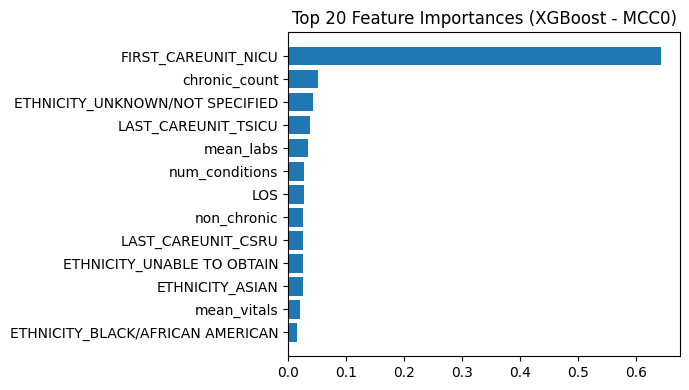

In [98]:
#feature importance
importances = model.feature_importances_
feature_names = X.columns 
feat_imp = pd.DataFrame({'feature': feature_names, 'importance': importances})
feat_imp = feat_imp.sort_values(by='importance', ascending=False)

#top 20
print("\nTop 20 important features")
print(feat_imp.head(20))

#bottom 10
print("\nBottom 10 important features")
print(feat_imp.tail(10))

#Visualization
plt.figure(figsize=(7, 4))
plt.barh(feat_imp.head(20)['feature'], feat_imp.head(20)['importance'])
plt.gca().invert_yaxis()
plt.title('Top 20 Feature Importances (XGBoost - MCC0)')
plt.tight_layout()
plt.show()

In [99]:
y_pred_custom_xgb_mcc0 = y_pred_custom.copy()
y_proba_xgb_mcc0 = y_proba.copy()
y_test_xgb_mcc0 = y_test.copy()

In [100]:
xgb_metrics_mcc0 = get_metrics(y_test, y_pred_custom_xgb_mcc0, y_proba_xgb_mcc0)
print(xgb_metrics_mcc0)

[0.9172185430463576, 0.1693121693121693, 0.64, 0.26778242677824265, 0.9011046511627907]


In [101]:
#SMOTE on MCC=1 for XGBoost
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_recall_curve

#applying one-hot to make these specific columns binary; the rest of the columns from 'df_mcc_1'
#will not be taken to be binary
df_encoded = pd.get_dummies(
    df_mcc_1,
    columns=["ETHNICITY", "FIRST_CAREUNIT", "LAST_CAREUNIT", "GENDER"],
    drop_first=True
)
#some features have really low importance for the final result, so it is better to drop them
#So, first, creating this list.
#deciding which features to drop exactly based on the Feature importance below
low_importance = [
    "ETHNICITY_MIDDLE EASTERN",
    "ETHNICITY_HISPANIC/LATINO - MEXICAN",
    "ETHNICITY_PORTUGUESE",
    "ETHNICITY_SOUTH AMERICAN",
    "ETHNICITY_HISPANIC/LATINO - SALVADORAN",
    "ETHNICITY_HISPANIC/LATINO - CUBAN",
    "ETHNICITY_HISPANIC/LATINO - GUATEMALAN",
    "ETHNICITY_WHITE - EASTERN EUROPEAN",
    "ETHNICITY_WHITE - BRAZILIAN",
    "LAST_CAREUNIT_NICU",
    "ETHNICITY_ASIAN - JAPANESE",
    "ETHNICITY_ASIAN - FILIPINO",
    "ETHNICITY_ASIAN - OTHER",
    "ETHNICITY_HISPANIC/LATINO - COLOMBIAN",
    "ETHNICITY_HISPANIC/LATINO - HONDURAN",
    "ETHNICITY_HISPANIC/LATINO - CENTRAL AMERICAN (OTHER)",
    "ETHNICITY_BLACK/AFRICAN",
    "ETHNICITY_ASIAN - VIETNAMESE",
    "ETHNICITY_ASIAN - THAI",
    "ETHNICITY_CARIBBEAN ISLAND",
    "ETHNICITY_ASIAN - ASIAN INDIAN",
    "ETHNICITY_ASIAN - KOREAN",
    "ETHNICITY_WHITE - OTHER EUROPEAN",
    "ETHNICITY_PATIENT DECLINED TO ANSWER",
    "ETHNICITY_ASIAN - CAMBODIAN",
    "ETHNICITY_ASIAN - CHINESE",
    "ETHNICITY_HISPANIC/LATINO - PUERTO RICAN",
    "ETHNICITY_BLACK/CAPE VERDEAN",
    "ETHNICITY_NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER",
    "ETHNICITY_WHITE - RUSSIAN",
    "ETHNICITY_HISPANIC/LATINO - DOMINICAN",
    "MCC",
    "ETHNICITY_MULTI RACE ETHNICITY",
    "FIRST_CAREUNIT_MICU",
    "ETHNICITY_BLACK/HAITIAN",
    "GENDER_M",
    "ETHNICITY_OTHER",
    "FIRST_CAREUNIT_TSICU",
    "LAST_CAREUNIT_SICU",
    "FIRST_CAREUNIT_CSRU",
    "FIRST_CAREUNIT_SICU",
    "ETHNICITY_HISPANIC OR LATINO",
    "ETHNICITY_WHITE",
    "LAST_CAREUNIT_MICU",

]
#This is the actual drop of features
df_encoded.drop(columns=[col for col in low_importance if col in df_encoded.columns], inplace=True)

#X and y variables
X = df_encoded.drop(columns=["mortality"])
y = df_encoded["mortality"]

#the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

#the columns with numeric variables need to be extracted 
numeric_cols = ['LOS', 'chronic_count', 'mean_vitals', 'mean_labs', 'num_conditions']

scaler = StandardScaler()
#doing feature scaling for the "numeric_cols" list on train and test
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

#In order to have more balance in the groups, adding SMOTE method
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

#adding an interaction feature that catches the chronic conditions' interaction
X_train_res["chronic_x_los"] = X_train_res["chronic_count"] * X_train_res["LOS"]
X_train_res["numcond_x_los"] = X_train_res["num_conditions"] * X_train_res["LOS"]

#testing, making the predictions
X_test["chronic_x_los"] = X_test["chronic_count"] * X_test["LOS"]
X_test["numcond_x_los"] = X_test["num_conditions"] * X_test["LOS"]

#adding class weight
from sklearn.utils.class_weight import compute_class_weight
classes = np.unique(y_train_res)
weights = compute_class_weight('balanced', classes=classes, y=y_train_res)
class_weight_dict = dict(zip(classes, weights))
scale_pos_weight = class_weight_dict[1] / class_weight_dict[0]

#training the XGBoost with better expectations
model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    n_estimators=150,
    max_depth=6,
    learning_rate=0.05,
    n_jobs=-1,
    scale_pos_weight=scale_pos_weight 
)
model.fit(X_train_res, y_train_res)

#probability prediction
y_proba = model.predict_proba(X_test)[:, 1]

#not using a specific threshold for better balance
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
best_threshold = None
for p, r, t in zip(precision, recall, thresholds[:len(recall)]):
    if r >= 0.65 and p >= 0.20:
        best_threshold = t
        break

if best_threshold is None:
    print("No threshold with recall ≥ 0.65 and precision ≥ 0.20 — using 0.4")
    best_threshold = 0.4

y_pred_custom = (y_proba >= best_threshold).astype(int)

print("\nMCC1 XGBoost balanced threshold")
print("Accuracy:", accuracy_score(y_test, y_pred_custom))
print("Classification Report:\n", classification_report(y_test, y_pred_custom))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_custom))
print("AUC Score:", roc_auc_score(y_test, y_proba))


MCC1 XGBoost balanced threshold
Accuracy: 0.7290746737317241
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.73      0.83      9284
           1       0.20      0.68      0.31       907

    accuracy                           0.73     10191
   macro avg       0.58      0.71      0.57     10191
weighted avg       0.89      0.73      0.79     10191

Confusion Matrix:
 [[6812 2472]
 [ 289  618]]
AUC Score: 0.7867583000142033


In [102]:
#The research priority is identifying deaths (high recall, F1, and precision).
#From the outputs of MCC=0 and MCC=0 for XGBoost, MCC=1 is better based on the recall, F1, and Precision.
#Even though accuracy and AUC are lower for MCC=1 (due to class imbalance), recall, F1, and precision are more effective 
#for mortality prediction, which is the key goal in my research.

In [103]:
#additional step after smote only for xgboost and random forest
#Checking Feature Importance to see if which columns can be dropped that create noise
#for MCC1


Top 20 important features
                                              feature  importance
12                                 LAST_CAREUNIT_CSRU    0.261928
3                                      num_conditions    0.130064
5                                           mean_labs    0.126987
0                                                 LOS    0.083595
1                                       chronic_count    0.064405
9                          ETHNICITY_UNABLE TO OBTAIN    0.060027
10                    ETHNICITY_UNKNOWN/NOT SPECIFIED    0.058935
11                                FIRST_CAREUNIT_NICU    0.058106
4                                         mean_vitals    0.038771
13                                LAST_CAREUNIT_TSICU    0.028348
8                    ETHNICITY_BLACK/AFRICAN AMERICAN    0.027915
14                                      chronic_x_los    0.027864
15                                      numcond_x_los    0.021463
7                                     ETHNICITY_A

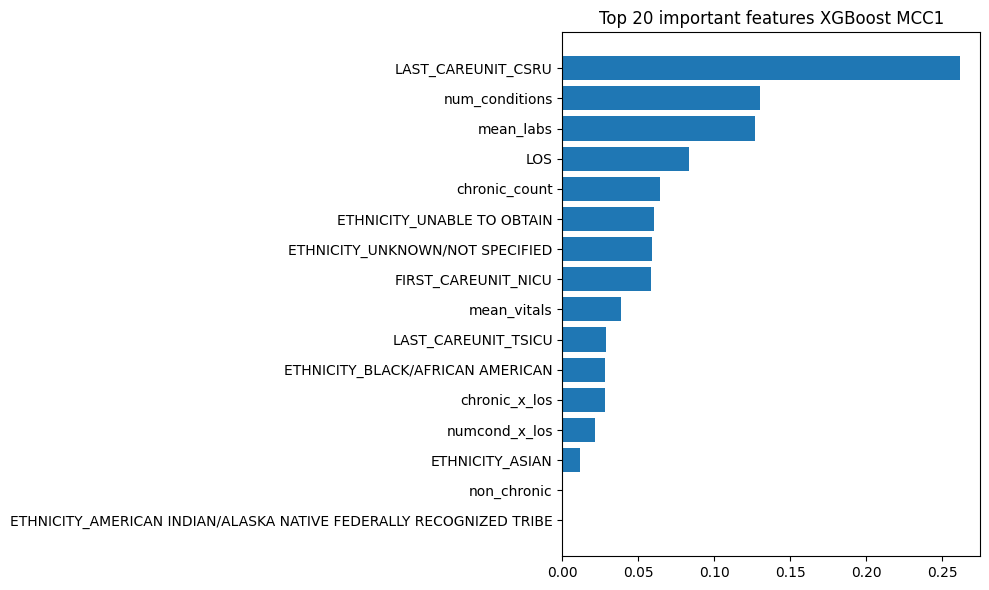

In [104]:
#feature importance
importances = model.feature_importances_
feature_names = X_train_res.columns
feat_imp = pd.DataFrame({'feature': feature_names, 'importance': importances})
feat_imp = feat_imp.sort_values(by='importance', ascending=False)

#top 20
print("\nTop 20 important features")
print(feat_imp.head(20))

#bottom 10
print("\nBottom 10 important features")
print(feat_imp.tail(10))

plt.figure(figsize=(10, 6))
plt.barh(feat_imp.head(20)['feature'], feat_imp.head(20)['importance'])
plt.gca().invert_yaxis()
plt.title('Top 20 important features XGBoost MCC1')
plt.tight_layout()
plt.show()


In [105]:
y_pred_custom_xgb_mcc1 = y_pred_custom.copy()
y_proba_xgb_mcc1 = y_proba.copy()
y_test_xgb_mcc1 = y_test.copy()
xgb_metrics_mcc1 = get_metrics(y_test_xgb_mcc1, y_pred_custom_xgb_mcc1, y_proba_xgb_mcc1)
print(xgb_metrics_mcc1)

[0.7290746737317241, 0.2, 0.681367144432194, 0.30923192394295723, 0.7867583000142033]


# Random Forest

In [106]:
#SMOTE with Random Forest MCC=0
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_recall_curve

#applying one-hot to make these specific columns binary; the rest of the columns from 'df_mcc_0'
#will not be taken to be binary
df_encoded = pd.get_dummies(
    df_mcc_0,  
    columns=["ETHNICITY", "FIRST_CAREUNIT", "LAST_CAREUNIT", "GENDER"],
    drop_first=True
)
# some features have really low importance for the final result, so it is better to drop them
#So, first, creating this list.
#deciding which features to drop exactly based on the Feature importance below
low_importance = [
    "ETHNICITY_MIDDLE EASTERN",
    "ETHNICITY_HISPANIC/LATINO - MEXICAN",
    "ETHNICITY_PORTUGUESE",
    "ETHNICITY_SOUTH AMERICAN",
    "ETHNICITY_HISPANIC/LATINO - SALVADORAN",
    "ETHNICITY_HISPANIC/LATINO - CUBAN",
    "ETHNICITY_HISPANIC/LATINO - GUATEMALAN",
    "ETHNICITY_WHITE - EASTERN EUROPEAN",
    "ETHNICITY_WHITE - BRAZILIAN",
    "LAST_CAREUNIT_NICU",
    "ETHNICITY_ASIAN - JAPANESE",
    "ETHNICITY_ASIAN - FILIPINO",
    "ETHNICITY_ASIAN - OTHER",
    "ETHNICITY_HISPANIC/LATINO - COLOMBIAN",
    "ETHNICITY_HISPANIC/LATINO - HONDURAN",
    "ETHNICITY_HISPANIC/LATINO - CENTRAL AMERICAN (OTHER)",  
    "ETHNICITY_BLACK/AFRICAN",
    "ETHNICITY_ASIAN - VIETNAMESE",
    "ETHNICITY_ASIAN - THAI",
    "ETHNICITY_CARIBBEAN ISLAND",
    "ETHNICITY_ASIAN - ASIAN INDIAN",
    "ETHNICITY_ASIAN - KOREAN",
    "ETHNICITY_WHITE - OTHER EUROPEAN",
    "ETHNICITY_PATIENT DECLINED TO ANSWER",
    "ETHNICITY_ASIAN - CAMBODIAN",
    "ETHNICITY_ASIAN - CHINESE",
    "ETHNICITY_HISPANIC/LATINO - PUERTO RICAN",
    "ETHNICITY_BLACK/CAPE VERDEAN",
    "ETHNICITY_NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER",
    "ETHNICITY_WHITE - RUSSIAN",
    "ETHNICITY_HISPANIC/LATINO - DOMINICAN",
    "MCC",
    "ETHNICITY_MULTI RACE ETHNICITY",
    "FIRST_CAREUNIT_MICU",
    "ETHNICITY_BLACK/HAITIAN",
    "GENDER_M",
    "ETHNICITY_OTHER",
    "FIRST_CAREUNIT_TSICU",
    "LAST_CAREUNIT_SICU",
    "FIRST_CAREUNIT_CSRU",
    "FIRST_CAREUNIT_SICU",
    "ETHNICITY_HISPANIC OR LATINO",
    "ETHNICITY_WHITE",
    "LAST_CAREUNIT_MICU",

]
#This is the actual drop of features
df_encoded.drop(columns=[col for col in low_importance if col in df_encoded.columns], inplace=True)

#X and y variables
X = df_encoded.drop(columns=["mortality"])
y = df_encoded["mortality"]

#the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

#extracting the columns with numeric variables
numeric_cols = ['LOS', 'chronic_count', 'mean_vitals', 'mean_labs', 'num_conditions']

scaler = StandardScaler()
#doing feature scaling for the "numeric_cols" list on train and test
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

#In order to have more balance in the groups, I add SMOTE method
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

#Now when there is balance, applying the Random Forest ML model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_res, y_train_res)

#probability prediction
y_proba = model.predict_proba(X_test)[:, 1]

# threshold is 0.4 - exact number
threshold = 0.4
#this is binary 0 or 1 
y_pred_thresh = (y_proba >= threshold).astype(int)

print("\nMCC=0 Random Forest Threshold = 0.4")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_thresh))
print("Classification Report:\n", classification_report(y_test, y_pred_thresh))
print("Accuracy:", accuracy_score(y_test, y_pred_thresh))
print("AUC Score:", roc_auc_score(y_test, y_proba))


MCC=0 Random Forest Threshold = 0.4
Confusion Matrix:
 [[1981   83]
 [  25   25]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97      2064
           1       0.23      0.50      0.32        50

    accuracy                           0.95      2114
   macro avg       0.61      0.73      0.64      2114
weighted avg       0.97      0.95      0.96      2114

Accuracy: 0.9489120151371807
AUC Score: 0.8982897286821705


In [107]:
#additional step after smote only for xgboost and random forest
#Checking Feature Importance to see if there are columns that can be dropped that create noise
#for MCC0


Top 20 Most important features
                             feature  importance
5                          mean_labs    0.183735
4                        mean_vitals    0.170029
0                                LOS    0.152141
3                     num_conditions    0.106727
10               FIRST_CAREUNIT_NICU    0.106342
2                        non_chronic    0.076707
12               LAST_CAREUNIT_TSICU    0.070403
1                      chronic_count    0.062585
9    ETHNICITY_UNKNOWN/NOT SPECIFIED    0.043843
11                LAST_CAREUNIT_CSRU    0.010274
7   ETHNICITY_BLACK/AFRICAN AMERICAN    0.008273
6                    ETHNICITY_ASIAN    0.005949
8         ETHNICITY_UNABLE TO OBTAIN    0.002993

Bottom 10 important features
                             feature  importance
3                     num_conditions    0.106727
10               FIRST_CAREUNIT_NICU    0.106342
2                        non_chronic    0.076707
12               LAST_CAREUNIT_TSICU    0.070403
1      

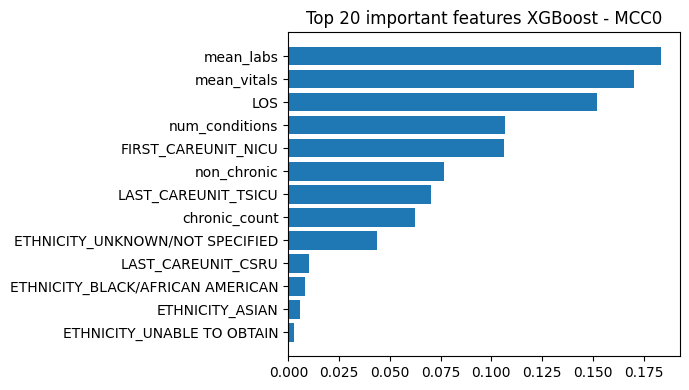

In [108]:
#Feature importance
importances = model.feature_importances_
feature_names = X.columns 

feat_imp = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

#top 20
print("\nTop 20 Most important features")
print(feat_imp.head(20))

#bottom 10
print("\nBottom 10 important features")
print(feat_imp.tail(10))

plt.figure(figsize=(7, 4))
plt.barh(feat_imp.head(20)['feature'], feat_imp.head(20)['importance'])
plt.gca().invert_yaxis()
plt.title('Top 20 important features XGBoost - MCC0')
plt.tight_layout()
plt.show()

In [109]:
y_pred_thresh_rf_mcc0 = y_pred_thresh.copy()
y_proba_rf_mcc0 = y_proba.copy()
y_test_rf_mcc0 = y_test.copy()

In [110]:
rf_metrics_mcc0 = get_metrics(y_test, y_pred_thresh_rf_mcc0, y_proba_rf_mcc0)
print(rf_metrics_mcc0)

[0.9489120151371807, 0.23148148148148148, 0.5, 0.31645569620253167, 0.8982897286821705]


In [113]:
#SMOTE with Random Forest MCC=1
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_recall_curve

#applying one-hot to make these specific columns binary; the rest of the columns from 'df_mcc_1'
#will not be taken to be binary
df_encoded = pd.get_dummies(
    df_mcc_1, 
    columns=["ETHNICITY", "FIRST_CAREUNIT", "LAST_CAREUNIT", "GENDER"],
    drop_first=True
)
# some features have really low importance for the final result, so it is better to drop them
#So, first, creating this list.
#deciding which features to drop exactly based on the Feature importance below
low_importance = [
    "ETHNICITY_MIDDLE EASTERN",
    "ETHNICITY_HISPANIC/LATINO - MEXICAN",
    "ETHNICITY_PORTUGUESE",
    "ETHNICITY_SOUTH AMERICAN",
    "ETHNICITY_HISPANIC/LATINO - SALVADORAN",
    "ETHNICITY_HISPANIC/LATINO - CUBAN",
    "ETHNICITY_HISPANIC/LATINO - GUATEMALAN",
    "ETHNICITY_WHITE - EASTERN EUROPEAN",
    "ETHNICITY_WHITE - BRAZILIAN",
    "LAST_CAREUNIT_NICU",
    "ETHNICITY_ASIAN - JAPANESE",
    "ETHNICITY_ASIAN - FILIPINO",
    "ETHNICITY_ASIAN - OTHER",
    "ETHNICITY_HISPANIC/LATINO - COLOMBIAN",
    "ETHNICITY_HISPANIC/LATINO - HONDURAN",
    "ETHNICITY_HISPANIC/LATINO - CENTRAL AMERICAN (OTHER)",
    "ETHNICITY_BLACK/AFRICAN",
    "ETHNICITY_ASIAN - VIETNAMESE",
    "ETHNICITY_ASIAN - THAI",
    "ETHNICITY_CARIBBEAN ISLAND",
    "ETHNICITY_ASIAN - ASIAN INDIAN",
    "ETHNICITY_ASIAN - KOREAN",
    "ETHNICITY_WHITE - OTHER EUROPEAN",
    "ETHNICITY_PATIENT DECLINED TO ANSWER",
    "ETHNICITY_ASIAN - CAMBODIAN",
    "ETHNICITY_ASIAN - CHINESE",
    "ETHNICITY_HISPANIC/LATINO - PUERTO RICAN",
    "ETHNICITY_BLACK/CAPE VERDEAN",
    "ETHNICITY_NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER",
    "ETHNICITY_WHITE - RUSSIAN",
    "ETHNICITY_HISPANIC/LATINO - DOMINICAN",
    "MCC",
    "ETHNICITY_MULTI RACE ETHNICITY",
    "FIRST_CAREUNIT_MICU",
    "ETHNICITY_BLACK/HAITIAN",
    "GENDER_M",
    "ETHNICITY_OTHER",
    "FIRST_CAREUNIT_TSICU",
    "LAST_CAREUNIT_SICU",
    "FIRST_CAREUNIT_CSRU",
    "FIRST_CAREUNIT_SICU",
    "ETHNICITY_HISPANIC OR LATINO",
    "ETHNICITY_WHITE",
    "LAST_CAREUNIT_MICU",

]
#This is the actual drop of features
df_encoded.drop(columns=[col for col in low_importance if col in df_encoded.columns], inplace=True)

#X and y variables
X = df_encoded.drop(columns=["mortality"])
y = df_encoded["mortality"]

#the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

#extracting the columns with numeric variables
numeric_cols = ['LOS', 'chronic_count', 'mean_vitals', 'mean_labs', 'num_conditions']

scaler = StandardScaler()
#doing feature scaling for the "numeric_cols" list on train and test
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

#In order to have more balance in the groups,adding SMOTE method
sm = SMOTE(random_state=42)
#It learns from X_train, y_train
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

#Now when there is balance, applying the Random Forest ML model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_res, y_train_res)

#probability prediction
y_proba = model.predict_proba(X_test)[:, 1]

#threshold is not defined with an exact number for better results
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
best_threshold = None
for p, r, t in zip(precision, recall, thresholds[:len(recall)]):
    if r >= 0.60 and p >= 0.18:
        best_threshold = t
        break

if best_threshold is None:
    best_threshold = 0.4
    print("No threshold with recall ≥ 0.60 and precision ≥ 0.18 when having default: 0.4")

y_pred_thresh = (y_proba >= best_threshold).astype(int)

print(f"\nMCC=1 Random Forest Threshold {round(best_threshold, 3)} ===")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_thresh))
print("Classification Report:\n", classification_report(y_test, y_pred_thresh))
print("Accuracy:", accuracy_score(y_test, y_pred_thresh))
print("AUC Score:", roc_auc_score(y_test, y_proba))


MCC=1 Random Forest Threshold 0.33 ===
Confusion Matrix:
 [[6508 2776]
 [ 291  616]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.70      0.81      9284
           1       0.18      0.68      0.29       907

    accuracy                           0.70     10191
   macro avg       0.57      0.69      0.55     10191
weighted avg       0.89      0.70      0.76     10191

Accuracy: 0.6990481797664606
AUC Score: 0.7596558577619521


In [114]:
#additional step after smote only for xgboost and random forest
#Checking Feature Importance to see if any columns can be dropped that create noise
#for MCC1


Top 20 Most important features
                                              feature  importance
5                                           mean_labs    0.223049
0                                                 LOS    0.217262
3                                      num_conditions    0.197398
4                                         mean_vitals    0.172426
1                                       chronic_count    0.117549
12                                 LAST_CAREUNIT_CSRU    0.034192
10                    ETHNICITY_UNKNOWN/NOT SPECIFIED    0.009317
13                                LAST_CAREUNIT_TSICU    0.008349
8                    ETHNICITY_BLACK/AFRICAN AMERICAN    0.007592
11                                FIRST_CAREUNIT_NICU    0.005124
9                          ETHNICITY_UNABLE TO OBTAIN    0.004412
7                                     ETHNICITY_ASIAN    0.003292
6   ETHNICITY_AMERICAN INDIAN/ALASKA NATIVE FEDERA...    0.000038
2                                         no

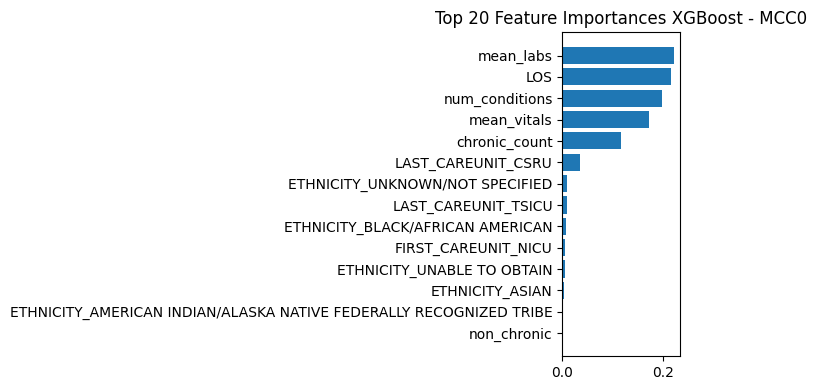

In [115]:
#Feature importance
importances = model.feature_importances_
feature_names = X.columns 

feat_imp = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

#top 20
print("\nTop 20 Most important features")
print(feat_imp.head(20))

#bottom 10
print("\nBottom 10 important features")
print(feat_imp.tail(10))

plt.figure(figsize=(7, 4))
plt.barh(feat_imp.head(20)['feature'], feat_imp.head(20)['importance'])
plt.gca().invert_yaxis()
plt.title('Top 20 Feature Importances XGBoost - MCC0')
plt.tight_layout()
plt.show()

In [116]:
y_pred_thresh_rf_mcc1 = y_pred_thresh.copy()
y_proba_rf_mcc1 = y_proba.copy()
y_test_rf_mcc1 = y_test.copy() 
rf_metrics_mcc1 = get_metrics(y_test_rf_mcc1, y_pred_thresh_rf_mcc1, y_proba_rf_mcc1)
print(rf_metrics_mcc1)

[0.6990481797664606, 0.18160377358490565, 0.679162072767365, 0.2865782740172133, 0.7596558577619521]


# KNN

In [117]:
#KNN with SMOTE MCC=0 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_recall_curve

#applying one-hot to make these specific columns binary; the rest of the columns from 'df_mcc_0'
#will not be taken to be binary
df_encoded = pd.get_dummies(
    df_mcc_0,
    columns=["ETHNICITY", "FIRST_CAREUNIT", "LAST_CAREUNIT", "GENDER"],
    drop_first=True
)
#X and y variables
X = df_encoded.drop(columns=["mortality"])
y = df_encoded["mortality"]

#the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

#extracting the columns with numeric variables
numeric_cols = ['LOS', 'chronic_count', 'mean_vitals', 'mean_labs']

scaler = StandardScaler()
#I do feature scaling for the "numeric_cols" list on train and test
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

#In order to have more balance in the groups, adding SMOTE method
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

#Now when there is balance, trianing the KNN ML model
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
#training the model with balanced classes because of SMOTE method
knn.fit(X_train_res, y_train_res)

#probability prediction
y_proba = knn.predict_proba(X_test)[:, 1]

#exact threshold of 0.4
threshold = 0.4
y_pred_thresh = (y_proba >= threshold).astype(int)

print("\nMCC0 KNN Threshold = 0.4")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_thresh))
print("Classification Report:\n", classification_report(y_test, y_pred_thresh))
print("Accuracy:", accuracy_score(y_test, y_pred_thresh))
print("AUC Score:", roc_auc_score(y_test, y_proba))


MCC0 KNN Threshold = 0.4
Confusion Matrix:
 [[1903  161]
 [  28   22]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.92      0.95      2064
           1       0.12      0.44      0.19        50

    accuracy                           0.91      2114
   macro avg       0.55      0.68      0.57      2114
weighted avg       0.97      0.91      0.93      2114

Accuracy: 0.9105960264900662
AUC Score: 0.6944767441860465


In [118]:
y_pred_thresh_knn_mcc0 = y_pred_thresh.copy()
y_proba_knn_mcc0 = y_proba.copy()
y_test_knn_mcc0 = y_test.copy()

In [119]:
knn_metrics_mcc0 = get_metrics(y_test, y_pred_thresh_knn_mcc0, y_proba_knn_mcc0)
print(knn_metrics_mcc0)

[0.9105960264900662, 0.12021857923497267, 0.44, 0.1888412017167382, 0.6944767441860465]


In [120]:
#KNN with SMOTE MCC=1
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_recall_curve

#applying one-hot to make these specific columns binary; the rest of the columns from 'df_mcc_1'
#will not be taken to be binary
df_encoded = pd.get_dummies(
    df_mcc_1,
    columns=["ETHNICITY", "FIRST_CAREUNIT", "LAST_CAREUNIT", "GENDER"],
    drop_first=True
)

#X and y variables
X = df_encoded.drop(columns=["mortality"])
y = df_encoded["mortality"]

#the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

#extracting the columns with numeric variables
numeric_cols = ['LOS', 'chronic_count', 'mean_vitals', 'mean_labs']

scaler = StandardScaler()
#doing feature scaling for the "numeric_cols" list on train and test
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

#In order to have more balance in the groups, adding the SMOTE method
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

#Now, when there is a balance, training the KNN ML model
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
#training the model with balanced classes because of the SMOTE method
knn.fit(X_train_res, y_train_res)

#probability prediction
y_proba = knn.predict_proba(X_test)[:, 1]

#exact threshold of 0.4
threshold = 0.4
y_pred_thresh = (y_proba >= threshold).astype(int)

print("\nMCC1 KNN Threshold = 0.4")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_thresh))
print("Classification Report:\n", classification_report(y_test, y_pred_thresh))
print("Accuracy:", accuracy_score(y_test, y_pred_thresh))
print("AUC Score:", roc_auc_score(y_test, y_proba))


MCC1 KNN Threshold = 0.4
Confusion Matrix:
 [[6385 2899]
 [ 450  457]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.69      0.79      9284
           1       0.14      0.50      0.21       907

    accuracy                           0.67     10191
   macro avg       0.54      0.60      0.50     10191
weighted avg       0.86      0.67      0.74     10191

Accuracy: 0.6713767049357277
AUC Score: 0.6255537618038076


In [121]:
y_pred_thresh_knn_mcc1 = y_pred_thresh.copy()
y_proba_knn_mcc1 = y_proba.copy()
y_test_knn_mcc1 = y_test.copy()
knn_metrics_mcc1 = get_metrics(y_test_knn_mcc1, y_pred_thresh_knn_mcc1, y_proba_knn_mcc1)
print(knn_metrics_mcc1)

[0.6713767049357277, 0.1361740166865316, 0.503858875413451, 0.21440300258034248, 0.6255537618038076]


## Graphs comparing MCC1 in XGBoost, Random Forest, LR and KNN

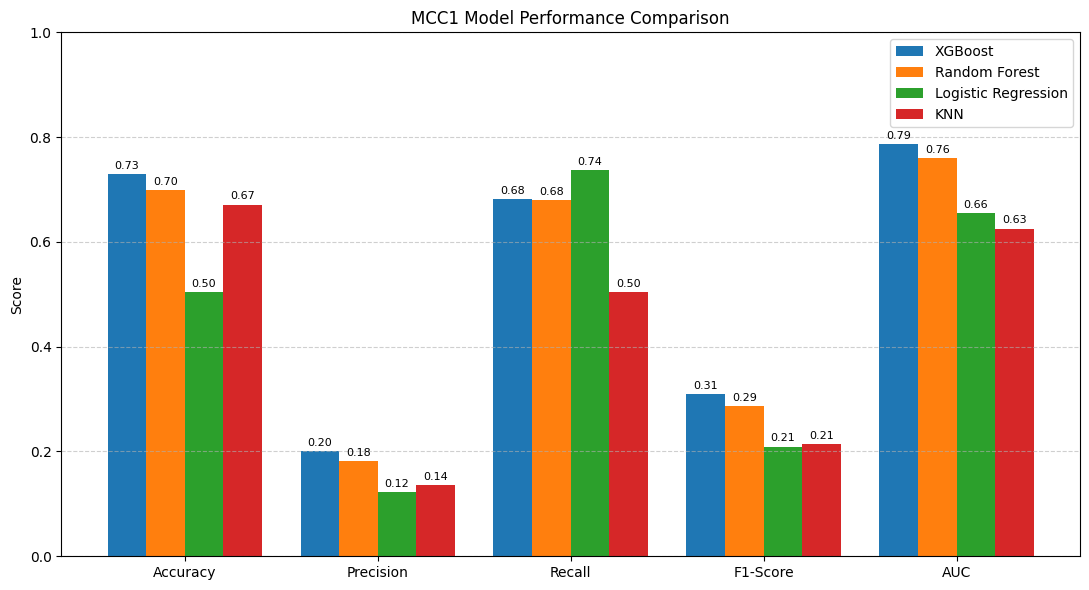

In [122]:
#Visualization
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def get_metrics(y_true, y_pred, y_proba):
    return [
        accuracy_score(y_true, y_pred),
        precision_score(y_true, y_pred, zero_division=0),
        recall_score(y_true, y_pred),
        f1_score(y_true, y_pred),
        roc_auc_score(y_true, y_proba)
    ]
lr_metrics_mcc1  = get_metrics(y_test_lr_mcc1,  y_pred_custom_lr_mcc1,  y_proba_lr_mcc1)
xgb_metrics_mcc1 = get_metrics(y_test_xgb_mcc1, y_pred_custom_xgb_mcc1, y_proba_xgb_mcc1)
rf_metrics_mcc1  = get_metrics(y_test_rf_mcc1,  y_pred_thresh_rf_mcc1,  y_proba_rf_mcc1)
knn_metrics_mcc1 = get_metrics(y_test_knn_mcc1, y_pred_thresh_knn_mcc1, y_proba_knn_mcc1)


metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']
x = np.arange(len(metrics))
bar_width = 0.2

plt.figure(figsize=(11, 6))
plt.bar(x - 1.5 * bar_width, xgb_metrics_mcc1, bar_width, label='XGBoost')
plt.bar(x - 0.5 * bar_width, rf_metrics_mcc1,  bar_width, label='Random Forest')
plt.bar(x + 0.5 * bar_width, lr_metrics_mcc1,  bar_width, label='Logistic Regression')
plt.bar(x + 1.5 * bar_width, knn_metrics_mcc1, bar_width, label='KNN')

for bars, offset in zip([xgb_metrics_mcc1, rf_metrics_mcc1, lr_metrics_mcc1, knn_metrics_mcc1], [-1.5, -0.5, 0.5, 1.5]):
    for i, val in enumerate(bars):
        plt.text(x[i] + offset * bar_width, val + 0.01, f'{val:.2f}', ha='center', fontsize=8)

plt.xticks(x, metrics)
plt.ylabel('Score')
plt.ylim(0, 1)
plt.title('MCC1 Model Performance Comparison')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Graphs comparing MCC0 in XGBoost, Random Forest, LR and KNN

In [123]:
#Since Logistic Regression and KNN rely on simpler assumptions and do not model feature interactions 
#explicitly. The results show overall lower performance than XGBoost and RF. XGBoost and Random Forest are considered more 
#advanced and reliable algorithms for this research.

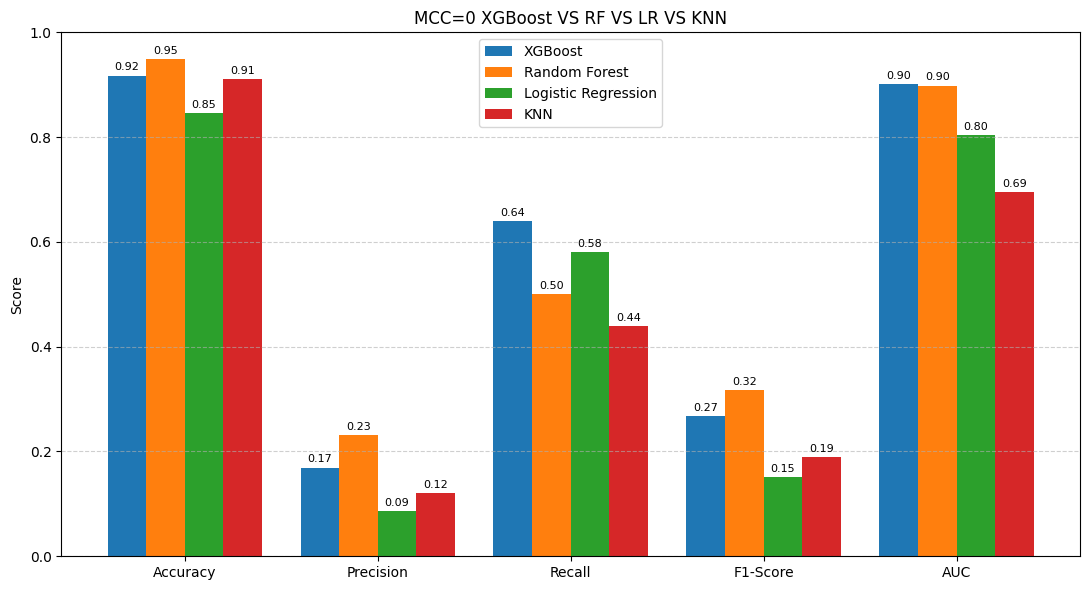

In [124]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
#Visualization
def get_metrics(y_true, y_pred, y_proba):
    return [
        accuracy_score(y_true, y_pred),
        precision_score(y_true, y_pred, zero_division=0),
        recall_score(y_true, y_pred),
        f1_score(y_true, y_pred),
        roc_auc_score(y_true, y_proba)
    ]

lr_metrics_mcc0  = get_metrics(y_test_lr_mcc0,  y_pred_custom_lr_mcc0,  y_prob_lr_mcc0)
xgb_metrics_mcc0 = get_metrics(y_test_xgb_mcc0, y_pred_custom_xgb_mcc0, y_proba_xgb_mcc0)
rf_metrics_mcc0  = get_metrics(y_test_rf_mcc0,  y_pred_thresh_rf_mcc0,  y_proba_rf_mcc0)
knn_metrics_mcc0 = get_metrics(y_test_knn_mcc0, y_pred_thresh_knn_mcc0, y_proba_knn_mcc0)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']
x = np.arange(len(metrics))
bar_width = 0.20

plt.figure(figsize=(11, 6))
plt.bar(x - 1.5 * bar_width, xgb_metrics_mcc0, bar_width, label='XGBoost')
plt.bar(x - 0.5 * bar_width, rf_metrics_mcc0,  bar_width, label='Random Forest')
plt.bar(x + 0.5 * bar_width, lr_metrics_mcc0,  bar_width, label='Logistic Regression')
plt.bar(x + 1.5 * bar_width, knn_metrics_mcc0, bar_width, label='KNN')

for bars, offset in zip([xgb_metrics_mcc0, rf_metrics_mcc0, lr_metrics_mcc0, knn_metrics_mcc0], [-1.5, -0.5, 0.5, 1.5]):
    for i, val in enumerate(bars):
        plt.text(x[i] + offset * bar_width, val + 0.01, f'{val:.2f}', ha='center', fontsize=8)

plt.xticks(x, metrics)
plt.ylabel('Score')
plt.title('MCC=0 XGBoost VS RF VS LR VS KNN')
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Graphs comparing MCC0 in XGBoost and Random Forest

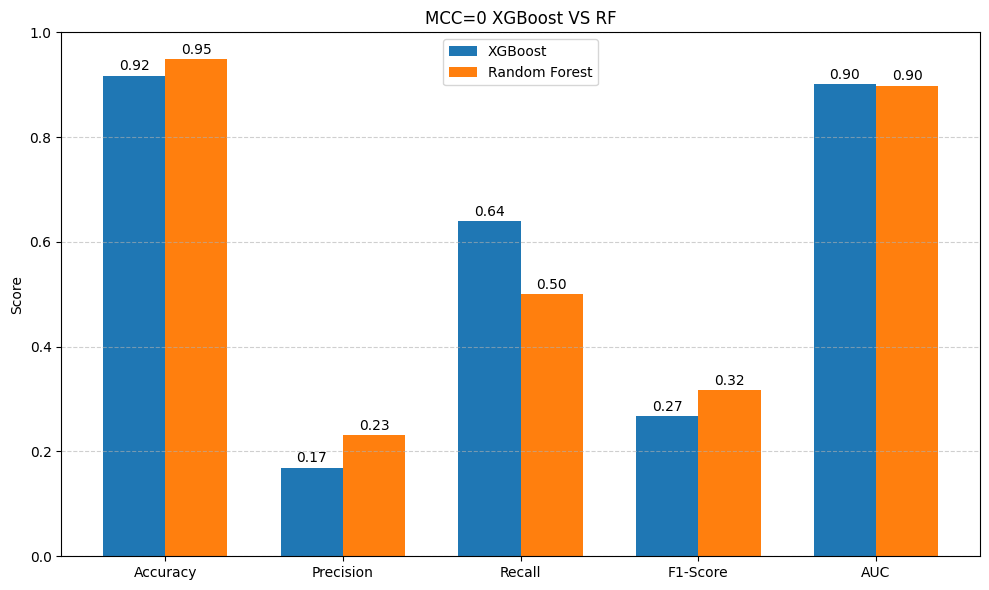

In [125]:
#Visualization
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']
x = np.arange(len(metrics))
bar_width = 0.35

xgb_mcc0 = xgb_metrics_mcc0
rf_mcc0 = rf_metrics_mcc0

plt.figure(figsize=(10, 6))
plt.bar(x - bar_width/2, xgb_mcc0, bar_width, label='XGBoost')
plt.bar(x + bar_width/2, rf_mcc0, bar_width, label='Random Forest')

for i, val in enumerate(xgb_mcc0):
    plt.text(i - bar_width/2, val + 0.01, f'{val:.2f}', ha='center')
for i, val in enumerate(rf_mcc0):
    plt.text(i + bar_width/2, val + 0.01, f'{val:.2f}', ha='center')

plt.xticks(x, metrics)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('MCC=0 XGBoost VS RF')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## Graphs comparing MCC1 in XGBoost and Random Forest

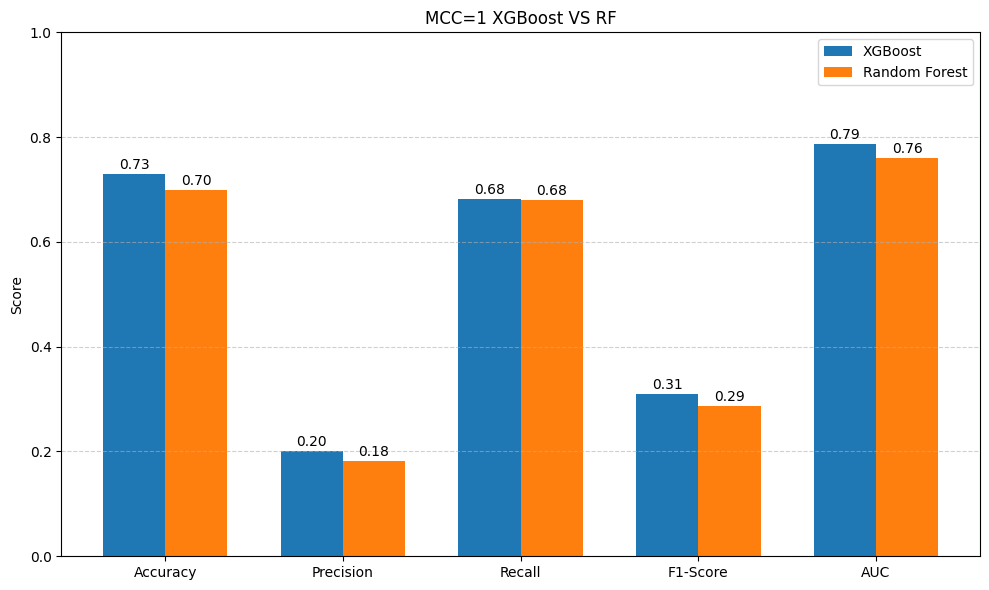

In [126]:
#Visualization
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']
x = np.arange(len(metrics))
bar_width = 0.35

xgb_mcc1 = xgb_metrics_mcc1
rf_mcc1 = rf_metrics_mcc1

plt.figure(figsize=(10, 6))
plt.bar(x - bar_width/2, xgb_mcc1, bar_width, label='XGBoost')
plt.bar(x + bar_width/2, rf_mcc1, bar_width, label='Random Forest')

for i, val in enumerate(xgb_mcc1):
    plt.text(i - bar_width/2, val + 0.01, f'{val:.2f}', ha='center')
for i, val in enumerate(rf_mcc1):
    plt.text(i + bar_width/2, val + 0.01, f'{val:.2f}', ha='center')

plt.xticks(x, metrics)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('MCC=1 XGBoost VS RF')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Side by side comparing XGBoost vs Random Forest for MCC=0 and MCC=1

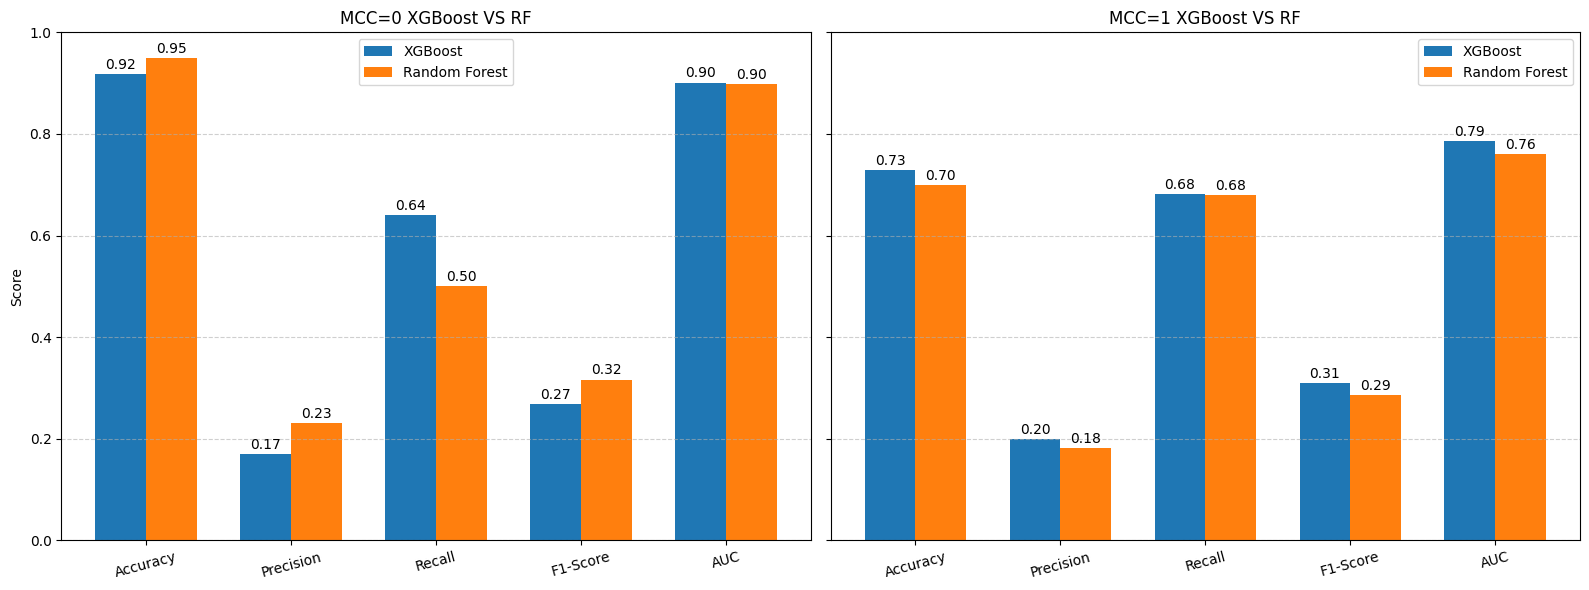

In [127]:
#Visualization
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']
x = np.arange(len(metrics))
bar_width = 0.35

xgb_mcc0 = xgb_metrics_mcc0
rf_mcc0  = rf_metrics_mcc0

xgb_mcc1 = xgb_metrics_mcc1
rf_mcc1  = rf_metrics_mcc1

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
axes[0].bar(x - bar_width/2, xgb_mcc0, bar_width, label='XGBoost')
axes[0].bar(x + bar_width/2, rf_mcc0, bar_width, label='Random Forest')
for i, val in enumerate(xgb_mcc0):
    axes[0].text(i - bar_width/2, val + 0.01, f'{val:.2f}', ha='center')
for i, val in enumerate(rf_mcc0):
    axes[0].text(i + bar_width/2, val + 0.01, f'{val:.2f}', ha='center')
axes[0].set_title('MCC=0 XGBoost VS RF')
axes[0].set_xticks(x)
axes[0].set_xticklabels(metrics, rotation=15)
axes[0].set_ylim(0, 1)
axes[0].set_ylabel('Score')
axes[0].grid(axis='y', linestyle='--', alpha=0.6)
axes[0].legend()

axes[1].bar(x - bar_width/2, xgb_mcc1, bar_width, label='XGBoost')
axes[1].bar(x + bar_width/2, rf_mcc1, bar_width, label='Random Forest')
for i, val in enumerate(xgb_mcc1):
    axes[1].text(i - bar_width/2, val + 0.01, f'{val:.2f}', ha='center')
for i, val in enumerate(rf_mcc1):
    axes[1].text(i + bar_width/2, val + 0.01, f'{val:.2f}', ha='center')
axes[1].set_title('MCC=1 XGBoost VS RF')
axes[1].set_xticks(x)
axes[1].set_xticklabels(metrics, rotation=15)
axes[1].set_ylim(0, 1)
axes[1].grid(axis='y', linestyle='--', alpha=0.6)
axes[1].legend()

plt.tight_layout()
plt.show()

## Comparing MCC0 and MCC1 in XGBoost

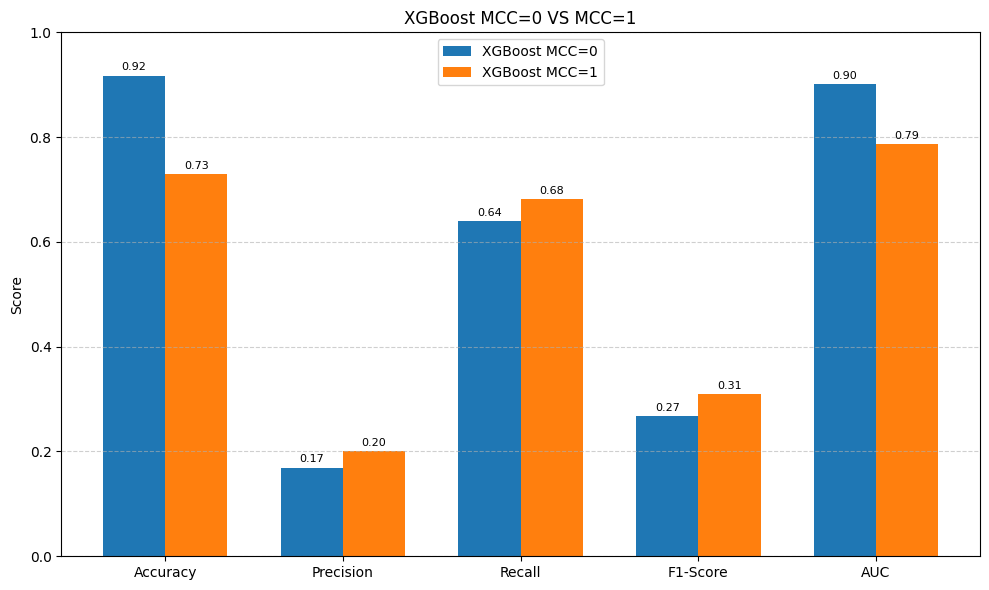

In [128]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# Visualization
def get_metrics(y_true, y_pred, y_proba):
    return [
        accuracy_score(y_true, y_pred),
        precision_score(y_true, y_pred, zero_division=0),
        recall_score(y_true, y_pred),
        f1_score(y_true, y_pred),
        roc_auc_score(y_true, y_proba)
    ]

xgb_metrics_mcc0 = get_metrics(y_test_xgb_mcc0, y_pred_custom_xgb_mcc0, y_proba_xgb_mcc0)
xgb_metrics_mcc1 = get_metrics(y_test_xgb_mcc1, y_pred_custom_xgb_mcc1, y_proba_xgb_mcc1)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']
x = np.arange(len(metrics))
bar_width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - bar_width/2, xgb_metrics_mcc0, bar_width, label='XGBoost MCC=0')
plt.bar(x + bar_width/2, xgb_metrics_mcc1, bar_width, label='XGBoost MCC=1')

for i, val in enumerate(xgb_metrics_mcc0):
    plt.text(i - bar_width/2, val + 0.01, f'{val:.2f}', ha='center', fontsize=8)
for i, val in enumerate(xgb_metrics_mcc1):
    plt.text(i + bar_width/2, val + 0.01, f'{val:.2f}', ha='center', fontsize=8)

plt.xticks(x, metrics)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('XGBoost MCC=0 VS MCC=1')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Comparing both groups, MCC=0 and MCC=1, XGBoost has higher performance on MCC=1 than MCC=0 according to Precision, Recall, and F1 - the most important metrics in mortality prediction.

As a result, the alternative hypothesis (H1) can be supported: Machine learning models improve ICU mortality prediction for patient admissions with multiple chronic conditions compared to patient admissions with 1 chronic condition along with possible non-chronic conditions.

patient admissions with multiple chronic conditions (MCC=1) 

patient admissions with 1 chronic condition along with other non-chronic conditions (MCC=0)

For mortality prediction, Precision, Recall, and F1 are significantly more important metrics than accuracy and AUC. 

Overall, after seeing the performance of all XGBoost and RF models, XGBoost outperformed RF, especially in MCC=1 group. Additionally, the MCC=1 group has more complexities, and even after that, XGBoost shows that it is the best model.

In MCC=0, RF is slightly better than XGBoost according to precision, accuracy and F1, but XGBoost has higher recall performance. The high recall in MCC=0 is crucially important in mortality prediction because it is costly when missing a false negative case, a mortality case.
Therefore, according to the MCC=0 group, Random Forest has better balance, but XGBoost has higher recall, which makes XGBoost more important and effective in death prediction despite the RF balance.


This research aimed to prove that the MCC=1 can get a higher mortality prediction than MCC=0. So it was found that XGBoost is the most accurate in mortality prediction.
Additionally, the traditional model SAPS II has AUC = 0.77 for the general table of patients, including all patients from MCC0 and MCC1, not separated into groups. 
XGBoost was calculated on the whole table 'final_df' from MIMIC III right before splitting the dataset into MCC0 and MCC1 groups.
And the result showed that XGBoost got AUC=0.81. Therefore, the best ML algorithm outperforms the most accurate traditional method.

Pipeline of the workflow

The steps in a pipeline are loading CSV files, removeing rows with missing values, merging datasets by ‘subject_id’, ‘admission_id’, dropping unnecessary columns, checking for chronic and non-chronic conditions based on an additional file, creating new columns: MCC, ‘chronic_count’, ‘is_chronic’, generating ‘final_df’, training XGBoost on full dataset (‘final_df’) to compare the AUC to SAPS II AUC, spliting the full dataset (‘final_df’) into df_mcc_0 and df_mcc_1 groups, Train/test LR, XGBoost, RF, KNN on ‘df_mcc_0’ and ‘df_mcc_1’, plotting and comparing model results, identifing best-performing model (XGBoost).